In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
#cargar archivos
df_result = pd.read_csv("../results/fechas_117/df_20250401_to_20250909_M20_preproc.csv") #cambiar la direccion

#params
M=50  #ajustar
sub_dir='../results/fechas_117/' #cambiar la direccion

In [3]:
import os

png_files = [f for f in os.listdir(sub_dir) if f.lower().endswith('.png')]
print(png_files)


['phi_precio_2QEK_20250401_to_20250909_M50.png', 'phi_precio_3DDT_20250401_to_20250909_M50.png', 'phi_precio_3ENA_20250401_to_20250909_M50.png', 'phi_precio_3HF5_20250401_to_20250909_M50.png', 'phi_precio_3INX_20250401_to_20250909_M50.png', 'phi_precio_3IQA_20250401_to_20250909_M50.png', 'phi_precio_3IRX_20250401_to_20250909_M50.png', 'phi_precio_3IZ6_20250401_to_20250909_M50.png', 'phi_precio_ALBG_20250401_to_20250909_M50.png', 'phi_precio_CHBG_20250401_to_20250909_M50.png', 'phi_precio_CHVR_20250401_to_20250909_M50.png', 'phi_precio_CLL1_20250401_to_20250909_M50.png', 'phi_precio_CLMG_20250401_to_20250909_M50.png', 'phi_precio_CTG1_20250401_to_20250909_M50.png', 'phi_precio_CTG2_20250401_to_20250909_M50.png', 'phi_precio_CUC1_20250401_to_20250909_M50.png', 'phi_precio_DVS1_20250401_to_20250909_M50.png', 'phi_precio_EPFV_20250401_to_20250909_M50.png', 'phi_precio_ESMR_20250409_to_20250909_M50.png', 'phi_precio_GE32_20250401_to_20250514_M50.png', 'phi_precio_GEC3_20250401_to_20250909_M

In [25]:
df_result['ratio_prueba']= df_result['EQpos'] / df_result['EdQb']
df_result['Fecha'] = pd.to_datetime(df_result['Fecha'])
df_result['precio'] = pd.to_numeric(df_result['precio'], errors='coerce')


df_result['phi_h'] =  np.maximum(
    df_result['precio'] + np.where(
        df_result['EdQb'] != 0,
         (df_result['EQpos'] / df_result['EdQb']),
       0
    ),
    0
)


In [26]:
df_result[
    (df_result['Fecha']=='2025-05-15') &
    (df_result['CodigoPlanta'].isin(['GVIO', 'PES1', 'SNCR']))
]

FechaHora CodigoPlanta  precio   cantidad  cantidad_pos  \
167705 2025-05-15 23:00:00         SNCR  117.39  1240000.0     1240000.0   
167706 2025-05-15 22:00:00         SNCR  117.39  1240000.0     1240000.0   
167707 2025-05-15 21:00:00         SNCR  117.39  1240000.0     1240000.0   
167708 2025-05-15 20:00:00         SNCR  117.39  1240000.0     1240000.0   
167709 2025-05-15 19:00:00         SNCR  117.39  1240000.0     1240000.0   
...                    ...          ...     ...        ...           ...   
168642 2025-05-15 04:00:00         GVIO  106.39  1210000.0     1210000.0   
168643 2025-05-15 03:00:00         GVIO  106.39  1210000.0     1210000.0   
168644 2025-05-15 02:00:00         GVIO  106.39  1210000.0     1210000.0   
168645 2025-05-15 01:00:00         GVIO  106.39  1210000.0     1210000.0   
168646 2025-05-15 00:00:00         GVIO  106.39  1210000.0     1210000.0   

            Fecha  cluster  gamma_thumb      EQpos         EdQb  ratio_prueba  \
167705 2025-05-15        9    24.943955  1240000.0 -2541.510704   -487.898791   
167706 2025-05-15        9    24.943955  1240000.0 -2289.304299   -541.649269   
167707 2025-05-15        9    24.943955  1240000.0 -1684.996955   -735.906374   
167708 2025-05-15        9    24.943955  1240000.0 -1410.275375   -879.260903   
167709 2025-05-15        9    24.943955  1240000.0 -1254.815106   -988.193395   
...           ...      ...          ...        ...          ...           ...   
168642 2025-05-15        9    24.946481  1210000.0 -2087.574226   -579.620109   
168643 2025-05-15        9    24.946481  1210000.0 -2088.981483   -579.229644   
168644 2025-05-15        9    24.946481  1210000.0 -2088.647458   -579.322276   
168645 2025-05-15        9    24.946481  1210000.0 -2085.155124   -580.292558   
168646 2025-05-15        9    24.946481  1210000.0 -2078.066490   -582.272033   

        phi_h  
167705    0.0  
167706    0.0  
167707    0.0  
167708    0.0  
167709    0.0  
...       ...  
168642    0.0  
168643    0.0  
168644    0.0  
168645    0.0  
168646    0.0  

[72 rows x 12 columns]

In [27]:
df_result[df_result['CodigoPlanta'].isin(['GVIO','PES1', 'SNCR'])]['phi_h']


581       0.0
582       0.0
583       0.0
584       0.0
585       0.0
         ... 
175423    0.0
175424    0.0
175425    0.0
175426    0.0
175427    0.0
Name: phi_h, Length: 8410, dtype: float64

In [28]:
df_result[
    (df_result['Fecha']=='2025-05-25') &
    (df_result['CodigoPlanta'].isin(['GVIO']))
]

FechaHora CodigoPlanta  precio   cantidad  cantidad_pos  \
1469 2025-05-25 23:00:00         GVIO  102.64  1230000.0     1230000.0   
1470 2025-05-25 22:00:00         GVIO  102.64  1230000.0     1230000.0   
1471 2025-05-25 21:00:00         GVIO  102.64  1230000.0     1230000.0   
1472 2025-05-25 20:00:00         GVIO  102.64  1230000.0     1230000.0   
1473 2025-05-25 19:00:00         GVIO  102.64  1230000.0     1230000.0   
1474 2025-05-25 18:00:00         GVIO  102.64  1230000.0     1230000.0   
1475 2025-05-25 17:00:00         GVIO  102.64  1230000.0     1230000.0   
1476 2025-05-25 16:00:00         GVIO  102.64  1230000.0     1230000.0   
1477 2025-05-25 15:00:00         GVIO  102.64  1230000.0     1230000.0   
1478 2025-05-25 14:00:00         GVIO  102.64  1230000.0     1230000.0   
1479 2025-05-25 13:00:00         GVIO  102.64  1230000.0     1230000.0   
1480 2025-05-25 12:00:00         GVIO  102.64  1230000.0     1230000.0   
1481 2025-05-25 11:00:00         GVIO  102.64  1230000.0     1230000.0   
1482 2025-05-25 10:00:00         GVIO  102.64  1230000.0     1230000.0   
1483 2025-05-25 09:00:00         GVIO  102.64  1230000.0     1230000.0   
1484 2025-05-25 08:00:00         GVIO  102.64  1230000.0     1230000.0   
1485 2025-05-25 07:00:00         GVIO  102.64  1230000.0     1230000.0   
1486 2025-05-25 06:00:00         GVIO  102.64  1230000.0     1230000.0   
1487 2025-05-25 05:00:00         GVIO  102.64  1230000.0     1230000.0   
1488 2025-05-25 04:00:00         GVIO  102.64  1230000.0     1230000.0   
1489 2025-05-25 03:00:00         GVIO  102.64  1230000.0     1230000.0   
1490 2025-05-25 02:00:00         GVIO  102.64  1230000.0     1230000.0   
1491 2025-05-25 01:00:00         GVIO  102.64  1230000.0     1230000.0   
1492 2025-05-25 00:00:00         GVIO  102.64  1230000.0     1230000.0   

          Fecha  cluster  gamma_thumb      EQpos         EdQb  ratio_prueba  \
1469 2025-05-25        6    24.946481  1230000.0 -2616.768603   -470.045383   
1470 2025-05-25        6    24.946481  1230000.0 -2565.459402   -479.446293   
1471 2025-05-25        6    24.946481  1230000.0 -1803.736433   -681.917811   
1472 2025-05-25        6    24.946481  1230000.0 -1624.902366   -756.968557   
1473 2025-05-25        6    24.946481  1230000.0 -1624.902366   -756.968557   
1474 2025-05-25        6    24.946481  1230000.0 -1651.742600   -744.668085   
1475 2025-05-25        6    24.946481  1230000.0 -2679.361768   -459.064548   
1476 2025-05-25        6    24.946481  1230000.0 -2661.305492   -462.179184   
1477 2025-05-25        6    24.946481  1230000.0 -2661.202959   -462.196991   
1478 2025-05-25        6    24.946481  1230000.0 -2679.841760   -458.982324   
1479 2025-05-25        6    24.946481  1230000.0 -2679.800739   -458.989350   
1480 2025-05-25        6    24.946481  1230000.0 -2679.841760   -458.982324   
1481 2025-05-25        6    24.946481  1230000.0 -2680.955390   -458.791670   
1482 2025-05-25        6    24.946481  1230000.0 -2668.682623   -460.901566   
1483 2025-05-25        6    24.946481  1230000.0 -2575.026495   -477.664988   
1484 2025-05-25        6    24.946481  1230000.0 -2597.865697   -473.465584   
1485 2025-05-25        6    24.946481  1230000.0 -2597.865697   -473.465584   
1486 2025-05-25        6    24.946481  1230000.0 -2597.865697   -473.465584   
1487 2025-05-25        6    24.946481  1230000.0 -2645.757914   -464.895141   
1488 2025-05-25        6    24.946481  1230000.0 -2645.757914   -464.895141   
1489 2025-05-25        6    24.946481  1230000.0 -2642.937830   -465.391197   
1490 2025-05-25        6    24.946481  1230000.0 -2621.524594   -469.192623   
1491 2025-05-25        6    24.946481  1230000.0 -2621.241653   -469.243268   
1492 2025-05-25        6    24.946481  1230000.0 -2617.835413   -469.853832   

      phi_h  
1469    0.0  
1470    0.0  
1471    0.0  
1472    0.0  
1473    0.0  
1474    0.0  
1475    0.0  
1476    0.0  
1477    0.0  
1478    0.0  
1479    0.0  
1480    0.0  
1481  

In [29]:
df_result.iloc[5048]

FechaHora       2025-07-02 02:00:00
CodigoPlanta                   TSJ1
precio                       291.71
cantidad                   165000.0
cantidad_pos               165000.0
Fecha           2025-07-02 00:00:00
cluster                          15
gamma_thumb                3.134335
EQpos                      165000.0
EdQb                    -133.008059
ratio_prueba            -1240.52634
phi_h                           0.0
Name: 5048, dtype: object

In [30]:
df_result[
    (df_result['cluster']==8) &
    (df_result['precio']==102.64)
]

FechaHora CodigoPlanta  precio   cantidad  cantidad_pos  \
105490 2025-05-08 23:00:00         2QEK  102.64    35000.0       35000.0   
105491 2025-05-08 22:00:00         2QEK  102.64    35000.0       35000.0   
105492 2025-05-08 21:00:00         2QEK  102.64    35000.0       35000.0   
105493 2025-05-08 20:00:00         2QEK  102.64    35000.0       35000.0   
105494 2025-05-08 19:00:00         2QEK  102.64    35000.0       35000.0   
...                    ...          ...     ...        ...           ...   
170223 2025-05-01 04:00:00         GVIO  102.64  1200000.0     1200000.0   
170224 2025-05-01 03:00:00         GVIO  102.64  1200000.0     1200000.0   
170225 2025-05-01 02:00:00         GVIO  102.64  1200000.0     1200000.0   
170226 2025-05-01 01:00:00         GVIO  102.64  1200000.0     1200000.0   
170227 2025-05-01 00:00:00         GVIO  102.64  1200000.0     1200000.0   

            Fecha  cluster  gamma_thumb      EQpos         EdQb  ratio_prueba  \
105490 2025-05-08        8     3.761274    35000.0 -1186.165853    -29.506835   
105491 2025-05-08        8     3.761274    35000.0  -802.683873    -43.603716   
105492 2025-05-08        8     3.761274    35000.0 -2255.818243    -15.515434   
105493 2025-05-08        8     3.761274    35000.0 -2082.677933    -16.805287   
105494 2025-05-08        8     3.761274    35000.0 -2432.492662    -14.388533   
...           ...      ...          ...        ...          ...           ...   
170223 2025-05-01        8    24.946481  1200000.0 -1917.693630   -625.751674   
170224 2025-05-01        8    24.946481  1200000.0 -1917.693630   -625.751674   
170225 2025-05-01        8    24.946481  1200000.0 -1917.693630   -625.751674   
170226 2025-05-01        8    24.946481  1200000.0 -1917.693630   -625.751674   
170227 2025-05-01        8    24.946481  1200000.0 -1907.093127   -629.229891   

            phi_h  
105490  73.133165  
105491  59.036284  
105492  87.124566  
105493  85.834713  
105494  88.251467  
...           ...  
170223   0.000000  
170224   0.000000  
170225   0.000000  
170226   0.000000  
170227   0.000000  

[1238 rows x 12 columns]

In [31]:
df_result[df_result['Fecha'] == pd.Timestamp('2025-05-14')]

FechaHora CodigoPlanta   precio  cantidad  cantidad_pos  \
161072 2025-05-14 23:00:00         TEC1  1488.84  213000.0      213000.0   
161073 2025-05-14 22:00:00         TEC1  1488.84  213000.0      213000.0   
161074 2025-05-14 21:00:00         TEC1  1488.84  213000.0      213000.0   
161075 2025-05-14 20:00:00         TEC1  1488.84  213000.0      213000.0   
161076 2025-05-14 19:00:00         TEC1  1488.84  213000.0      213000.0   
...                    ...          ...      ...       ...           ...   
162639 2025-05-14 04:00:00         ZPA2   373.39   36000.0       36000.0   
162640 2025-05-14 03:00:00         ZPA2   373.39   36000.0       36000.0   
162641 2025-05-14 02:00:00         ZPA2   373.39   36000.0       36000.0   
162642 2025-05-14 01:00:00         ZPA2   373.39   36000.0       36000.0   
162643 2025-05-14 00:00:00         ZPA2   373.39   36000.0       36000.0   

            Fecha  cluster  gamma_thumb     EQpos         EdQb  ratio_prueba  \
161072 2025-05-14       15     0.747557  213000.0  -790.236383   -269.539602   
161073 2025-05-14       15     0.747557  213000.0  -380.980312   -559.084009   
161074 2025-05-14       15     0.747557  213000.0 -4008.092759    -53.142483   
161075 2025-05-14       15     0.747557  213000.0  -670.245327   -317.794084   
161076 2025-05-14       15     0.747557  213000.0   -24.262799  -8778.871558   
...           ...      ...          ...       ...          ...           ...   
162639 2025-05-14       15     1.166288   36000.0 -1195.958642    -30.101375   
162640 2025-05-14       15     1.166288   36000.0 -1125.535323    -31.984780   
162641 2025-05-14       15     1.166288   36000.0 -1293.583029    -27.829679   
162642 2025-05-14       15     1.166288   36000.0 -1325.740946    -27.154626   
162643 2025-05-14       15     1.166288   36000.0 -1164.629253    -30.911125   

              phi_h  
161072  1219.300398  
161073   929.755991  
161074  1435.697517  
161075  1171.045916  
161076     0.000000  
...             ...  
162639   343.288625  
162640   341.405220  
162641   345.560321  
162642   346.235374  
162643   342.478875  

[1572 rows x 12 columns]

In [32]:
#agregar a nivel dia por empresa, esto es sumar h=1 hasta 23
# -------------------------------------------------------------------------
# Encontrar el termino  ∑_{h=0}^{23} E_{-it}[ Q_{ith} - pos_{ith} | s, p_{ht}=b_{it} ] )
# y el termino ( ∑_{h=0}^{23} E_{-it}[ ∂Q_{ith}/∂b_{it}    | s, p_{ht}=b_{it} ] )
# -------------------------------------------------------------------------

df_result['FechaHora'] = pd.to_datetime(df_result['FechaHora'], errors='coerce')
df_result['Fecha'] = df_result['FechaHora'].dt.date

df_grouped = (
    df_result.groupby(['Fecha', 'CodigoPlanta'], as_index=False)
      .agg(
          numerador=('EQpos', 'sum'),
          denominador=('EdQb', 'sum'),
          precio_d=('precio', 'max'),
          phi_agg=('phi_h', 'mean')
      )
)


#encontrar formula de costo marginal:
# -------------------------------------------------------------------------
#
#      φ_{it} = b_{it} +
#               ( ∑_{h=0}^{23} E_{-it}[ Q_{ith} - pos_{ith} | s, p_{ht}=b_{it} ] )
#               ----------------------------------------------------------------
#               ( ∑_{h=0}^{23} E_{-it}[ ∂Q_{ith}/∂b_{it}    | s, p_{ht}=b_{it} ] )
#
# -------------------------------------------------------------------------

# Evitar divisiones por cero
df_grouped['phi'] = np.maximum(
    df_grouped['precio_d'] + np.where(
        df_grouped['denominador'] != 0,
        df_grouped['numerador'] / df_grouped['denominador'],
        df_grouped['precio_d']
    ),
    0
)
df_grouped['Fecha'] = pd.to_datetime(df_grouped['Fecha'])

In [33]:
df_grouped[
    (df_grouped['Fecha'] == pd.Timestamp('2025-05-15')) &
    (df_grouped['phi'] < 0)
]


Empty DataFrame
Columns: [Fecha, CodigoPlanta, numerador, denominador, precio_d, phi_agg, phi]
Index: []

In [34]:
df_grouped[
    (df_grouped['Fecha'] == pd.Timestamp('2025-05-12')) &
    (df_grouped['phi'] < 0)
]

Empty DataFrame
Columns: [Fecha, CodigoPlanta, numerador, denominador, precio_d, phi_agg, phi]
Index: []

In [35]:
df_grouped[
    (df_grouped['Fecha'] == pd.Timestamp('2025-05-14')) &
    (df_grouped['phi'] > 0)
]

Fecha CodigoPlanta    numerador    denominador  precio_d  \
2107 2025-05-14         2QEK    770000.00  -18157.229084    102.64   
2108 2025-05-14         3DDT    593227.19   -9350.971283     99.19   
2109 2025-05-14         3ENA   4368000.00  -28861.257271    849.04   
2110 2025-05-14         3HF5    526267.90   -9924.642299     99.19   
2111 2025-05-14         3IQA    136300.91   -9117.496219     91.30   
2112 2025-05-14         3IRX    478173.29   -9250.158979     93.39   
2113 2025-05-14         3IZ6    461977.36  -11317.177958     92.39   
2117 2025-05-14         CLL1   1417488.63  -19834.437198     91.39   
2118 2025-05-14         CLMG   2671537.55  -19620.304766    502.39   
2119 2025-05-14         CTG1    630000.00 -102331.910006   1648.57   
2120 2025-05-14         CTG2    819000.00 -106076.046180   1737.65   
2121 2025-05-14         CUC1    594000.00  -11460.771531    102.64   
2123 2025-05-14         EPFV    298123.21   -8157.362688     99.19   
2124 2025-05-14         ESMR    310250.00  -15464.877422    107.39   
2125 2025-05-14         GE32   6120000.00  -24257.160782    288.95   
2126 2025-05-14         GEC3   3936000.00  -28518.709205    272.66   
2131 2025-05-14         HMIN    954000.00  -18535.324524     91.39   
2135 2025-05-14         MATA    361367.20   -8959.968171     92.39   
2136 2025-05-14         MOY1   1725000.00  -19175.662686    111.06   
2137 2025-05-14         MRL1   3936000.00  -27109.305012    952.51   
2141 2025-05-14         PPA1    441000.00  -19143.752683    285.29   
2142 2025-05-14         PPA2   1380000.00  -24270.693268    263.42   
2143 2025-05-14         PPA3   1680000.00  -26906.385555    273.68   
2144 2025-05-14         PPA4   3960000.00  -25489.583025    246.28   
2146 2025-05-14         PRDO   1173000.00  -19215.376855    102.64   
2147 2025-05-14         PRG2    945000.00  -51128.353606    825.54   
2149 2025-05-14         SLVJ   7313000.00  -37725.760250    472.39   
2150 2025-05-14         SMI1    880000.00  -16163.779236    102.64   
2154 2025-05-14         TBQ3   1380000.00  -45125.705153   1120.89   
2155 2025-05-14         TBQ4   1380000.00  -50389.641903   1113.41   
2156 2025-05-14         TBST  15408000.00  -35849.317346    757.58   
2157 2025-05-14         TCDT   6240000.00  -34862.735347    700.09   
2158 2025-05-14         TDR1    987000.00  -88733.925682   2129.06   
2159 2025-05-14         TEC1   5112000.00  -41307.173812   1488.84   
2160 2025-05-14         TFL1   3840000.00  -52022.614106    872.43   
2161 2025-05-14         TFL4  10680000.00  -53217.690936    764.85   
2162 2025-05-14         TGJ1   3480000.00  -21326.696707    555.98   
2163 2025-05-14         TGJ2   3120000.00  -19855.555852    536.03   
2164 2025-05-14         TPUY    430375.11  -10819.175099     97.93   
2165 2025-05-14         TRM1   1932000.00  -71467.867880   1961.02   
2166 2025-05-14         TRN1   1840000.00  -38853.879310    944.39   
2167 2025-05-14         TSJ2   4080000.00  -21719.552409    291.39   
2168 2025-05-14         TSR1   8448000.00  -44158.987474    904.44   
2169 2025-05-14         TVL1   5784000.00  -37947.062376   1186.92   
2170 2025-05-14         TYP1    326065.39  -91922.783642     96.39   
2171 2025-05-14         TYP2    588000.00  -17101.405543    893.39   
2172 2025-05-14         TYP3   1127000.00  -19864.008081     96.39   
2173 2025-05-14         TYP4   1012000.00  -36529.352407    893.39   
2175 2025-05-14         ZPA2    756000.00  -21772.815520    373.39   
2176 2025-05-14         ZPA4   1536000.00  -23386.532637    359.39   
2177 2025-05-14         ZPA5   1512000.00  -21834.335767    339.39   

          phi_agg          phi  
2107    55.047140    60.232648  
2108    29.556518    35.749832  
2109   572.272221   697.695242  
2110    43.244012    46.163615  
2111    54.545914    76.350621  
2112    35.942917    41.696479  
2113    41.013580    51.569103  
2117    23.961489    19.923963  
2118   295.926735   366.228122  
2119  1273.584865  1642.413563  
2120  

In [36]:
diff=df_result['precio']-df_result['phi_h']
diff.describe()

count    176194.000000
mean        159.860520
std         265.712295
min           0.000000
25%          42.346984
50%          99.540000
75%         121.142734
max        2313.830000
dtype: float64

In [37]:
df_grouped

Fecha CodigoPlanta   numerador   denominador  precio_d     phi_agg  \
0    2025-04-01         2QEK   120000.00 -63180.187366    113.37  108.864589   
1    2025-04-01         3DDT   861305.73 -33157.180533    107.37   73.801598   
2    2025-04-01         3ENA  4800000.00 -82282.458218    889.28  723.916433   
3    2025-04-01         3HF5   453773.97 -28667.935925    107.37   77.565072   
4    2025-04-01         3INX   275076.26 -27206.220316     97.37   77.961248   
...         ...          ...         ...           ...       ...         ...   
8087 2025-09-09         URA1  3096000.00 -11575.164763    118.94    6.959976   
8088 2025-09-09         ZPA2   468000.00  -7778.512512    372.94  305.805384   
8089 2025-09-09         ZPA3  1260000.00 -15419.687473    346.94  198.668968   
8090 2025-09-09         ZPA4  1280000.00 -11976.301401    360.94  200.584352   
8091 2025-09-09         ZPA5  1260000.00 -14355.057980    338.94  189.451097   

             phi  
0     111.470670  
1      81.393553  
2     830.944358  
3      91.541376  
4      87.259214  
...          ...  
8087    0.000000  
8088  312.774255  
8089  265.226282  
8090  254.062262  
8091  251.166060  

[8092 rows x 7 columns]

## Graficar

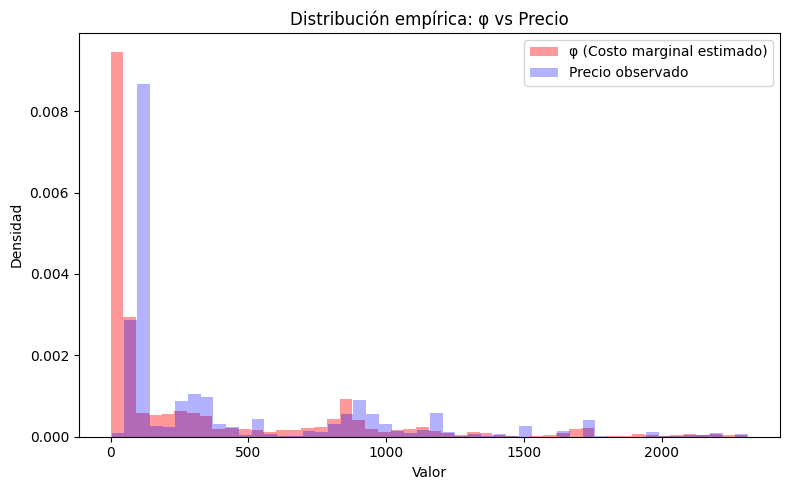

In [38]:
phi = pd.to_numeric(df_grouped['phi'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
precio = pd.to_numeric(df_grouped['precio_d'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8,5))
plt.hist(phi, bins=50, density=True, color="red", alpha=0.4, label="φ (Costo marginal estimado)")
plt.hist(precio, bins=50, density=True, color="blue", alpha=0.3, label="Precio observado")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución empírica: φ vs Precio")
plt.legend()
plt.tight_layout()
plt.show()

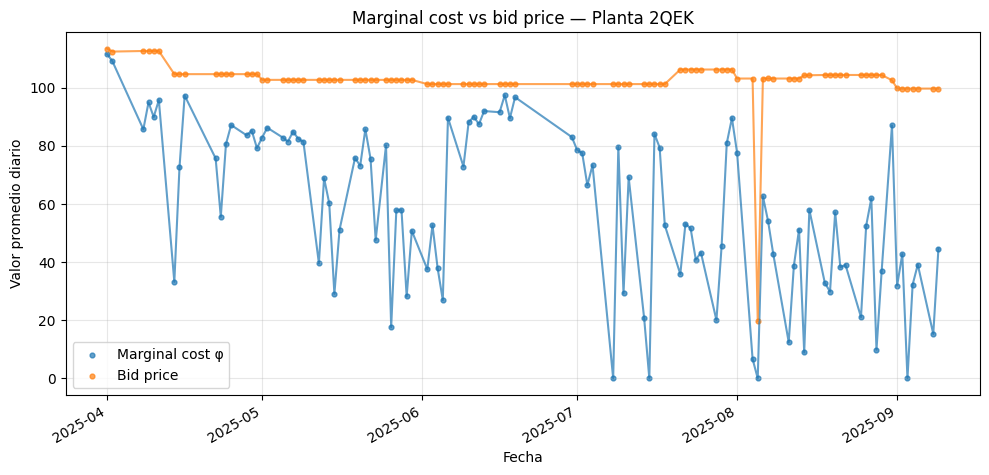

../results/fechas_117/phi_precio_2QEK_20250401_to_20250909_M50.png


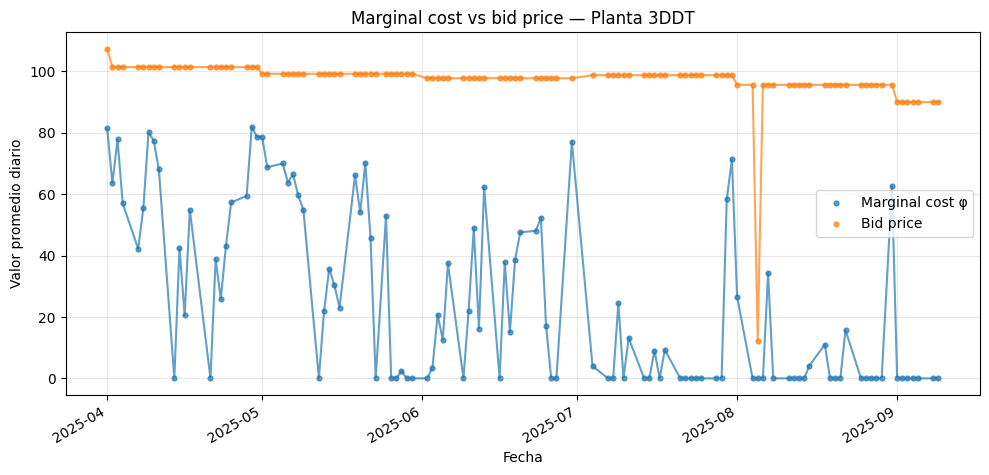

../results/fechas_117/phi_precio_3DDT_20250401_to_20250909_M50.png


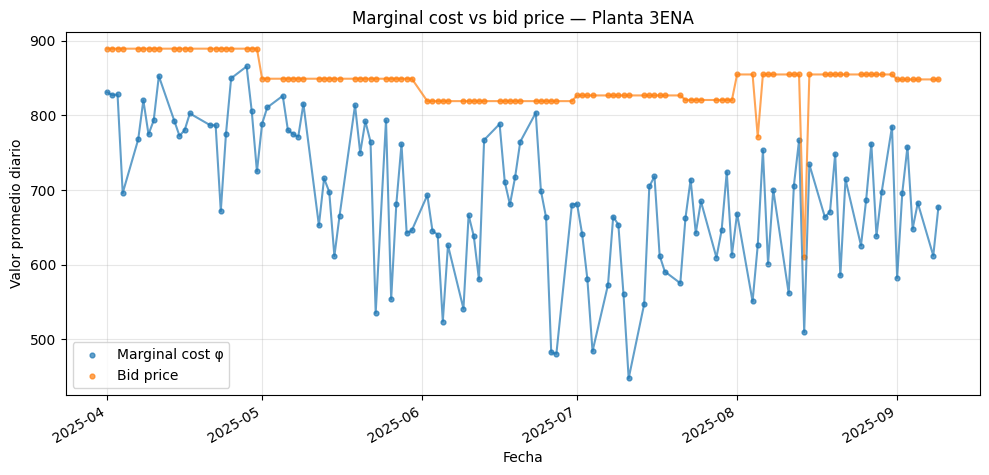

../results/fechas_117/phi_precio_3ENA_20250401_to_20250909_M50.png


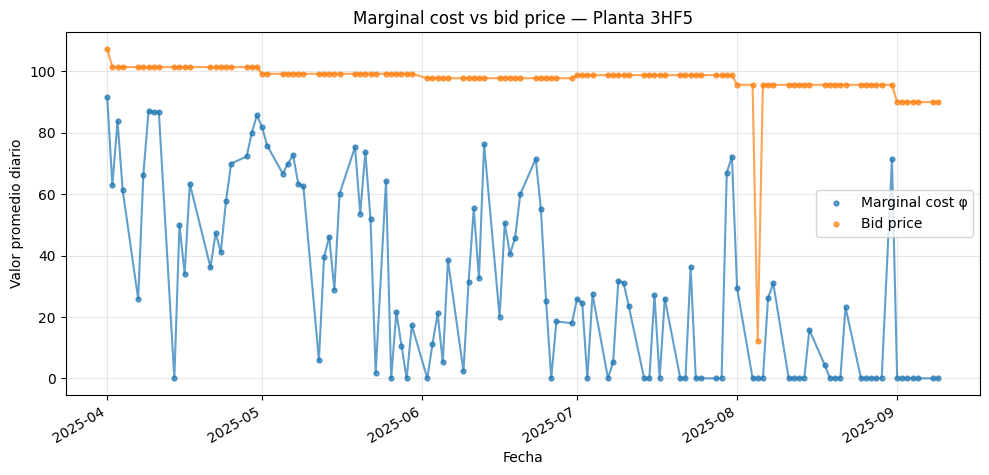

../results/fechas_117/phi_precio_3HF5_20250401_to_20250909_M50.png


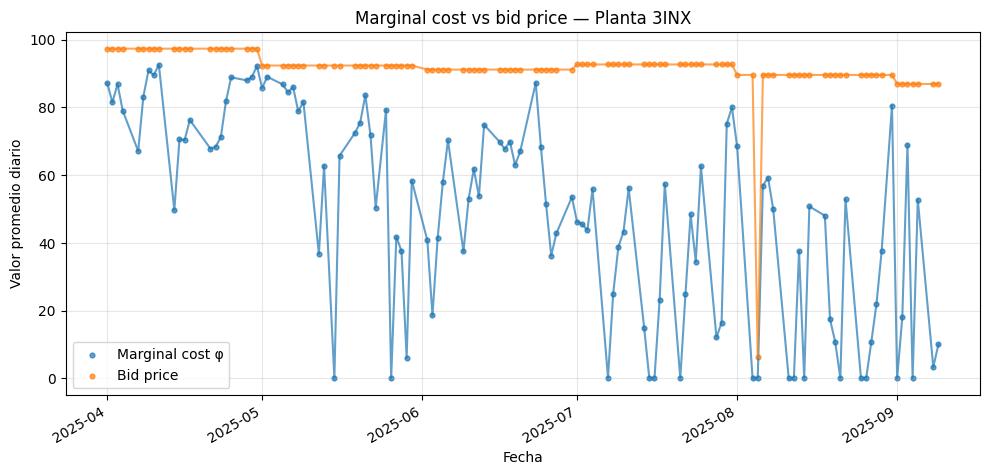

../results/fechas_117/phi_precio_3INX_20250401_to_20250909_M50.png


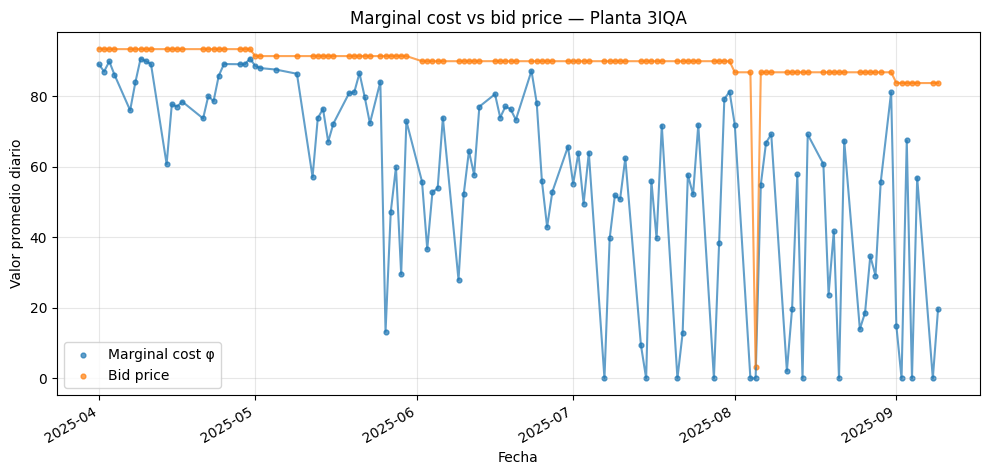

../results/fechas_117/phi_precio_3IQA_20250401_to_20250909_M50.png


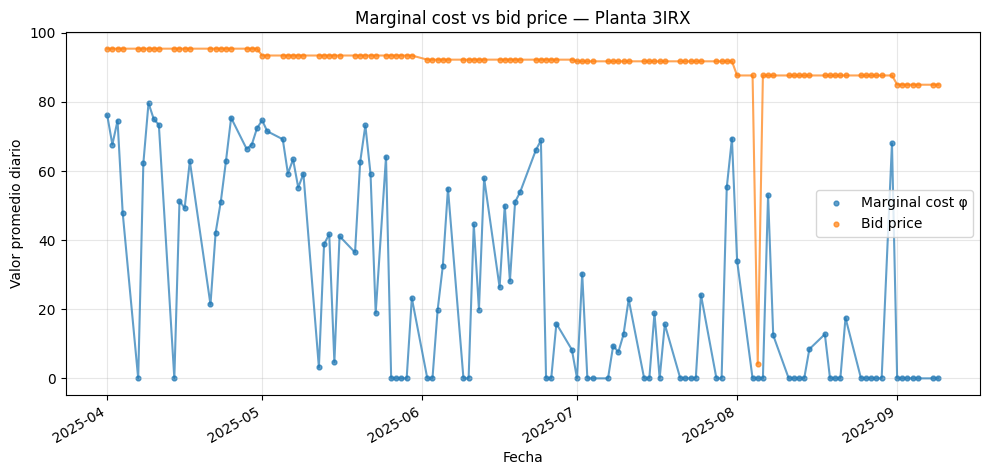

../results/fechas_117/phi_precio_3IRX_20250401_to_20250909_M50.png


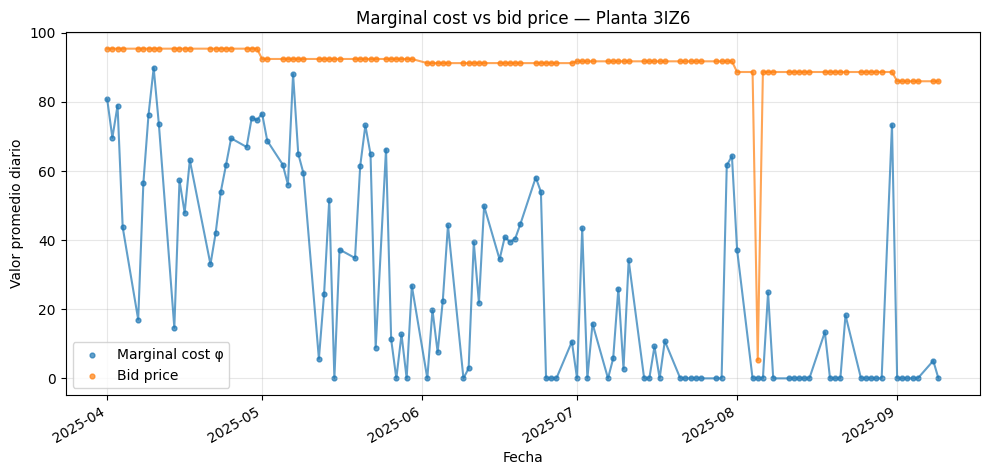

../results/fechas_117/phi_precio_3IZ6_20250401_to_20250909_M50.png


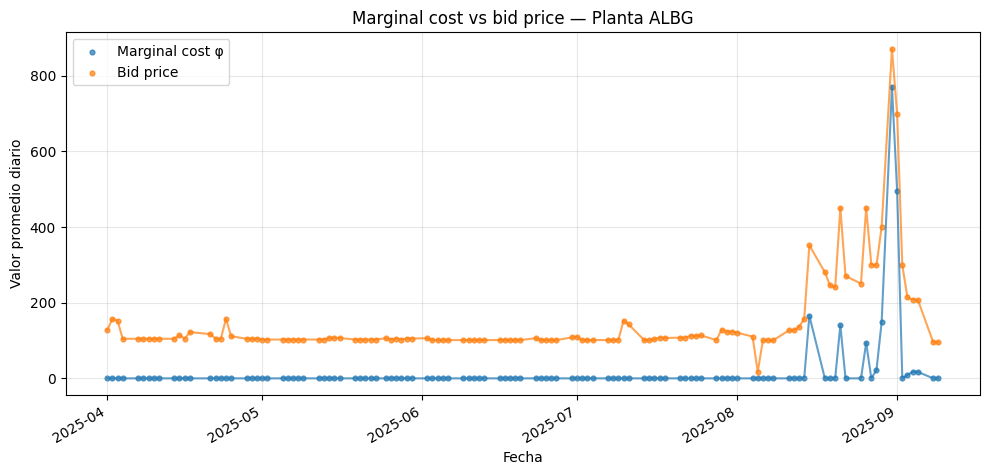

../results/fechas_117/phi_precio_ALBG_20250401_to_20250909_M50.png


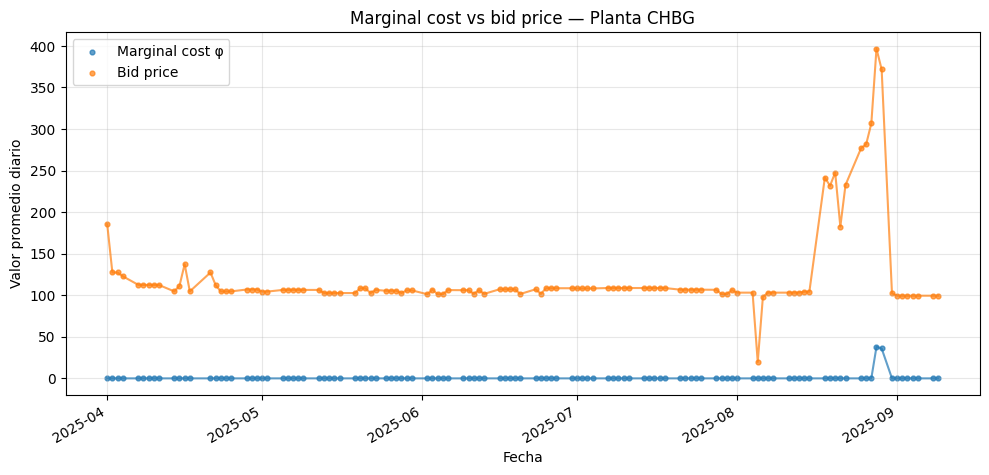

../results/fechas_117/phi_precio_CHBG_20250401_to_20250909_M50.png


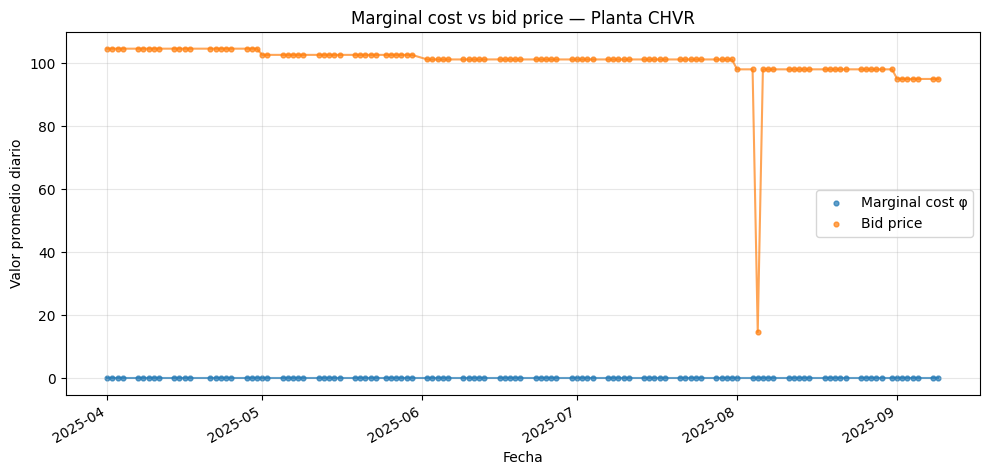

../results/fechas_117/phi_precio_CHVR_20250401_to_20250909_M50.png


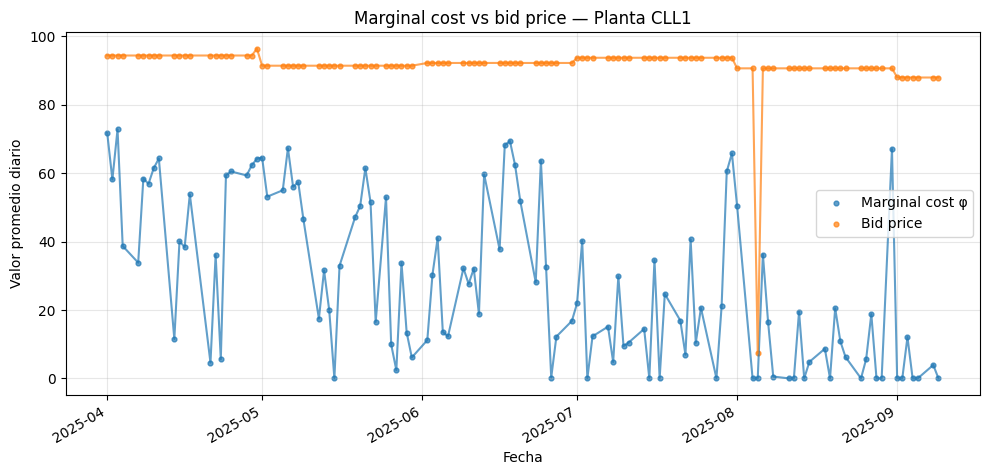

../results/fechas_117/phi_precio_CLL1_20250401_to_20250909_M50.png


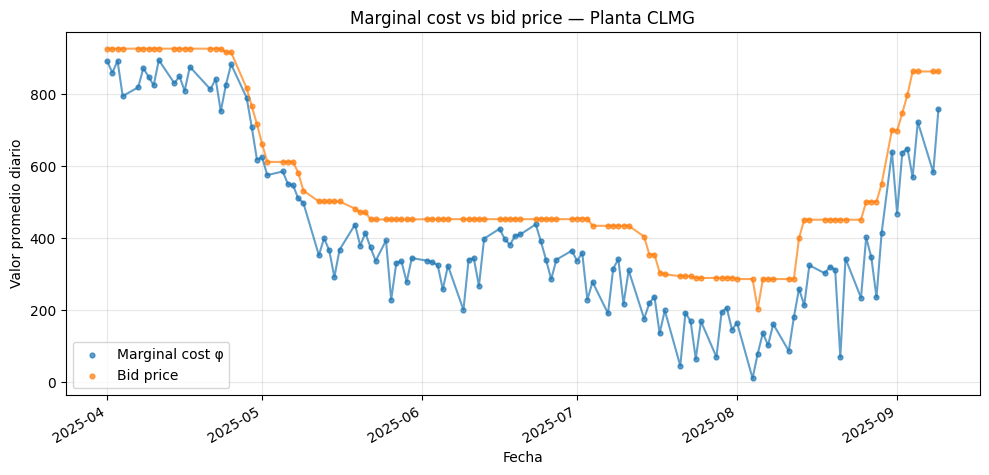

../results/fechas_117/phi_precio_CLMG_20250401_to_20250909_M50.png


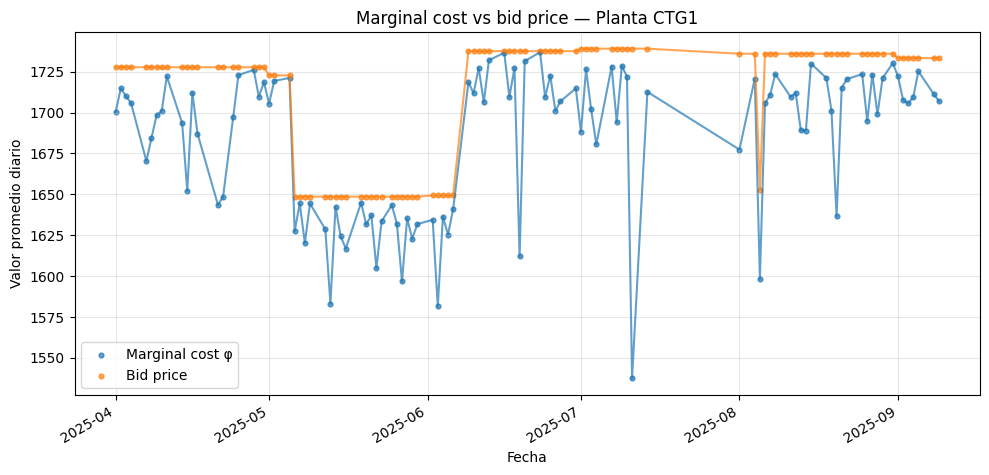

../results/fechas_117/phi_precio_CTG1_20250401_to_20250909_M50.png


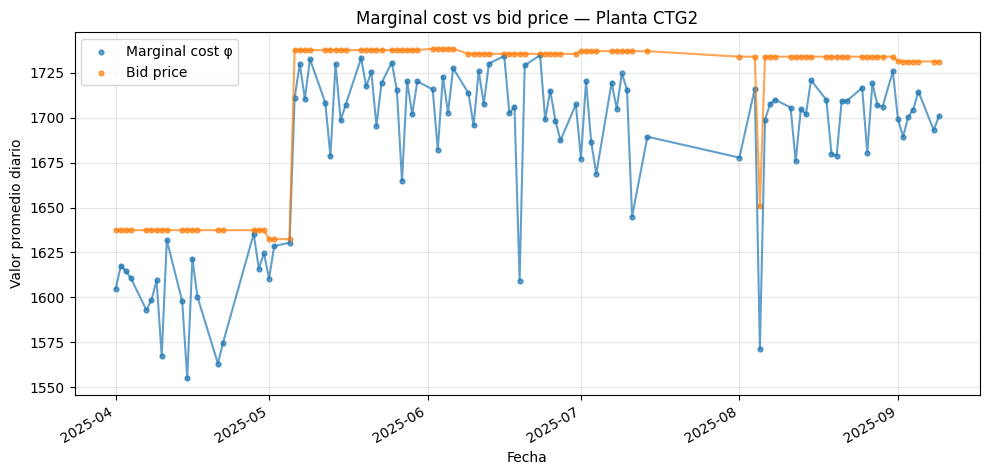

../results/fechas_117/phi_precio_CTG2_20250401_to_20250909_M50.png


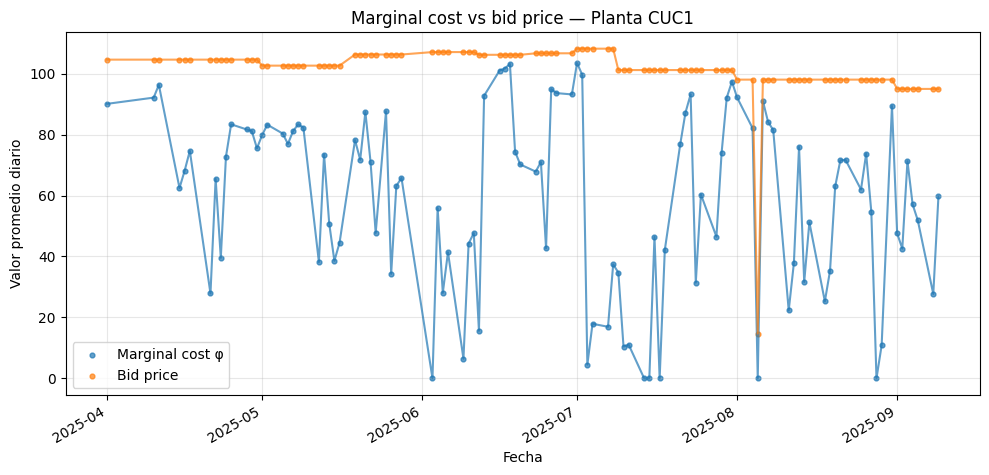

../results/fechas_117/phi_precio_CUC1_20250401_to_20250909_M50.png


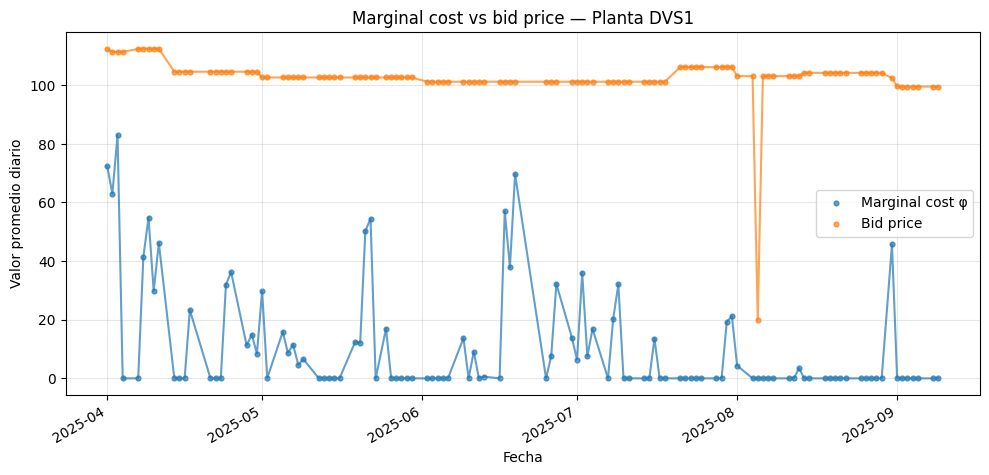

../results/fechas_117/phi_precio_DVS1_20250401_to_20250909_M50.png


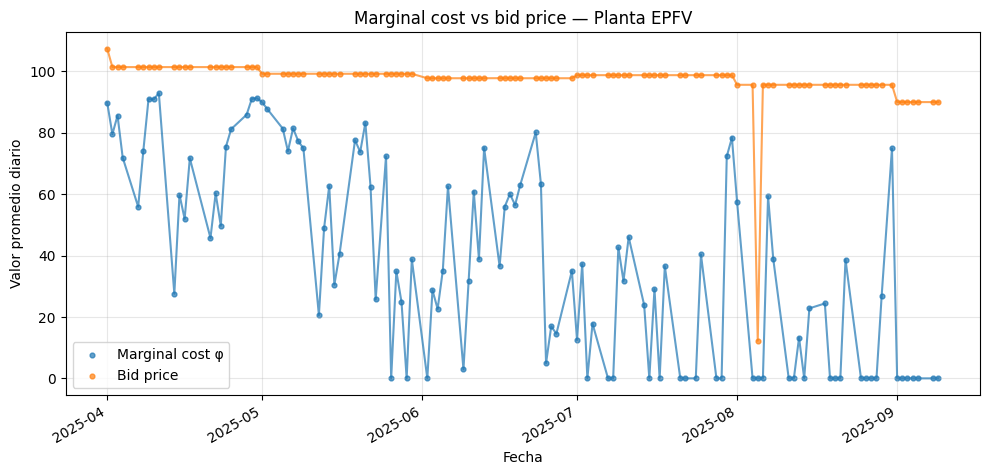

../results/fechas_117/phi_precio_EPFV_20250401_to_20250909_M50.png


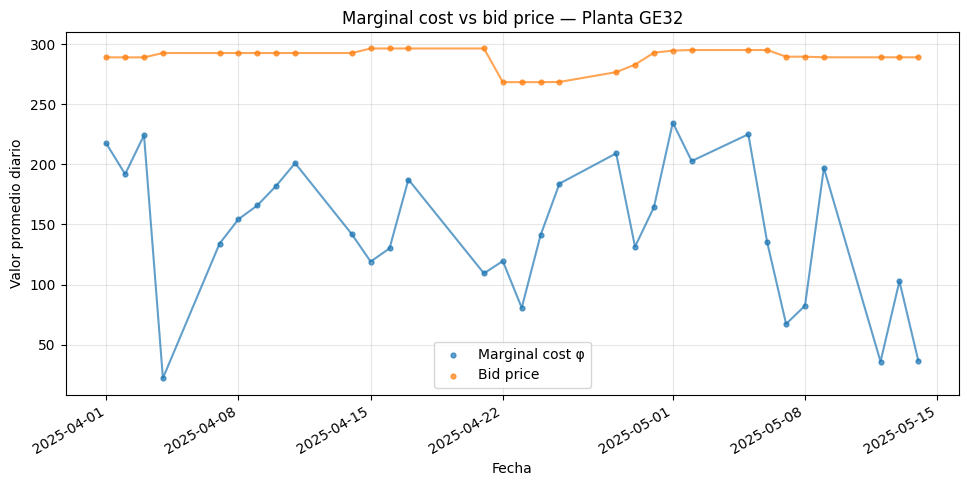

../results/fechas_117/phi_precio_GE32_20250401_to_20250514_M50.png


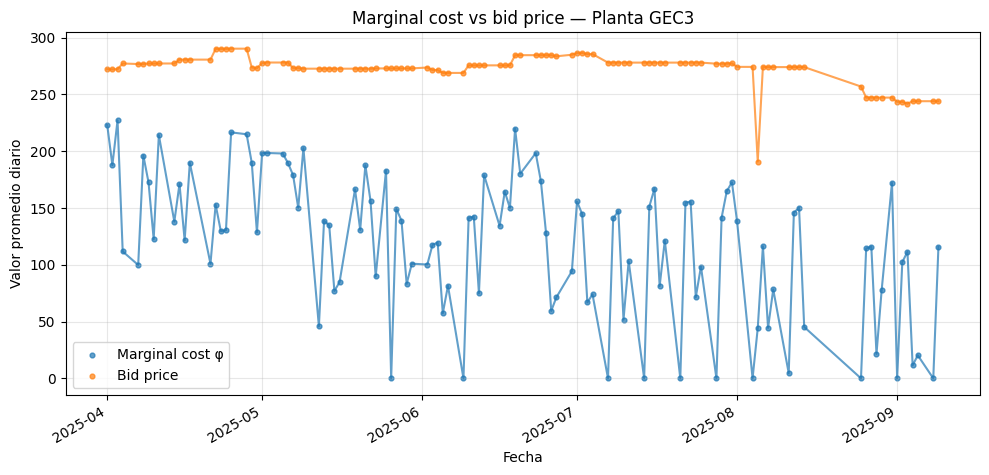

../results/fechas_117/phi_precio_GEC3_20250401_to_20250909_M50.png


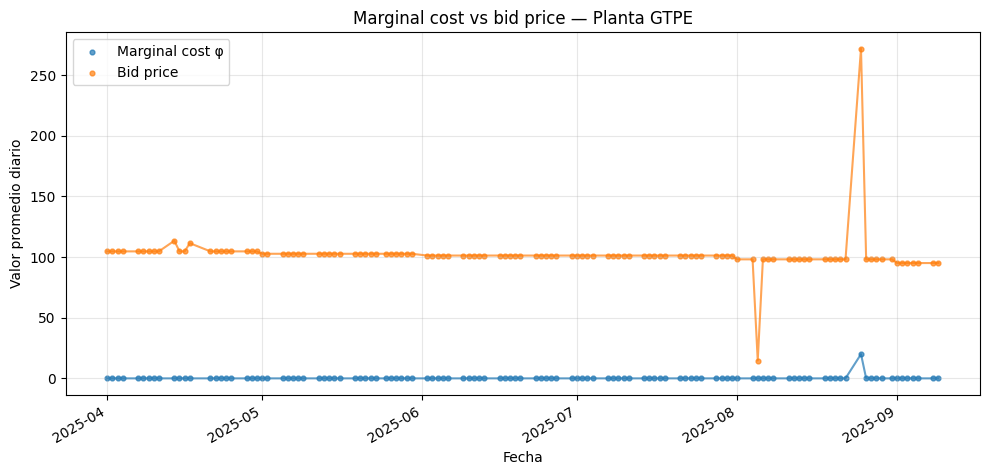

../results/fechas_117/phi_precio_GTPE_20250401_to_20250909_M50.png


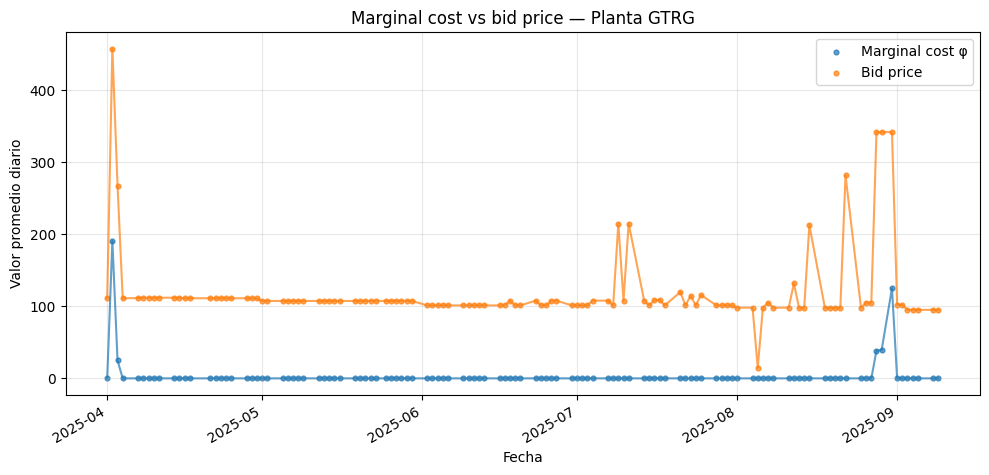

../results/fechas_117/phi_precio_GTRG_20250401_to_20250909_M50.png


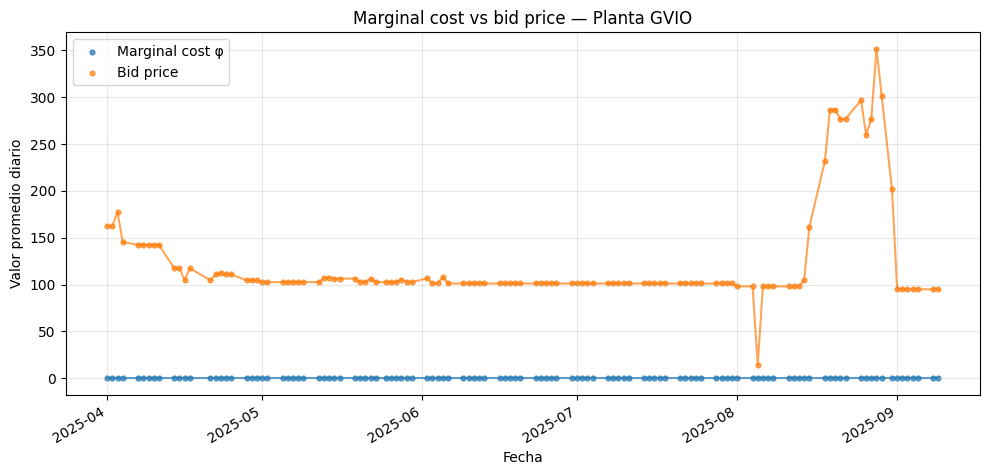

../results/fechas_117/phi_precio_GVIO_20250401_to_20250909_M50.png


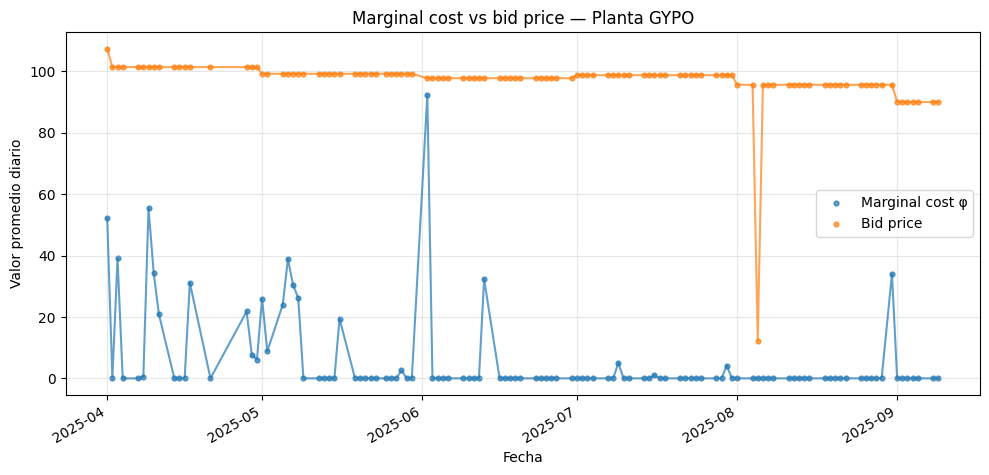

../results/fechas_117/phi_precio_GYPO_20250401_to_20250909_M50.png


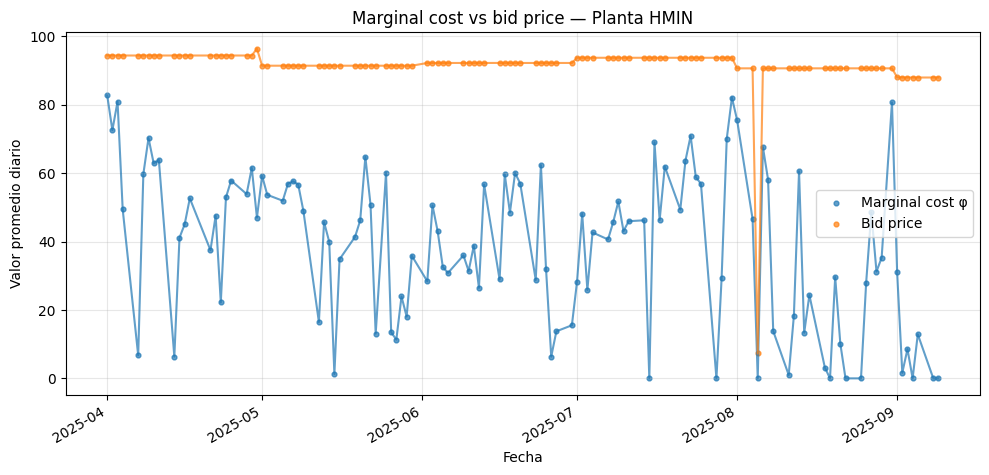

../results/fechas_117/phi_precio_HMIN_20250401_to_20250909_M50.png


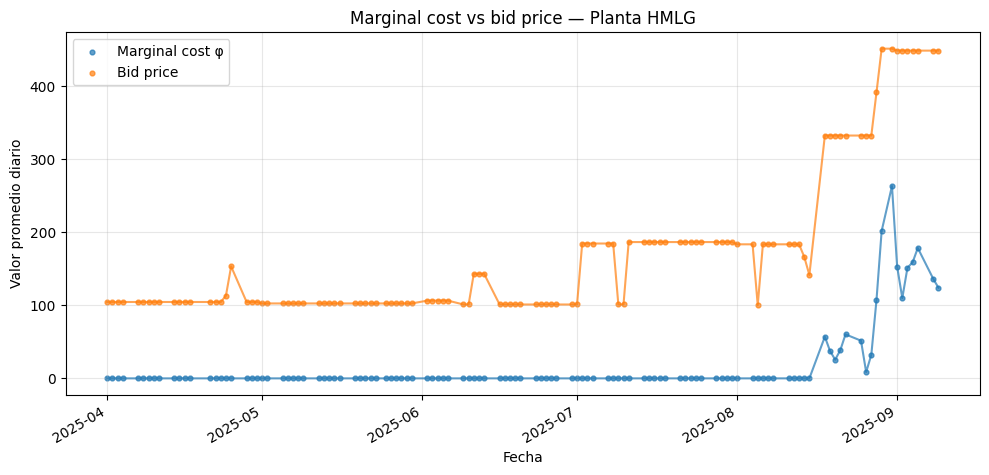

../results/fechas_117/phi_precio_HMLG_20250401_to_20250909_M50.png


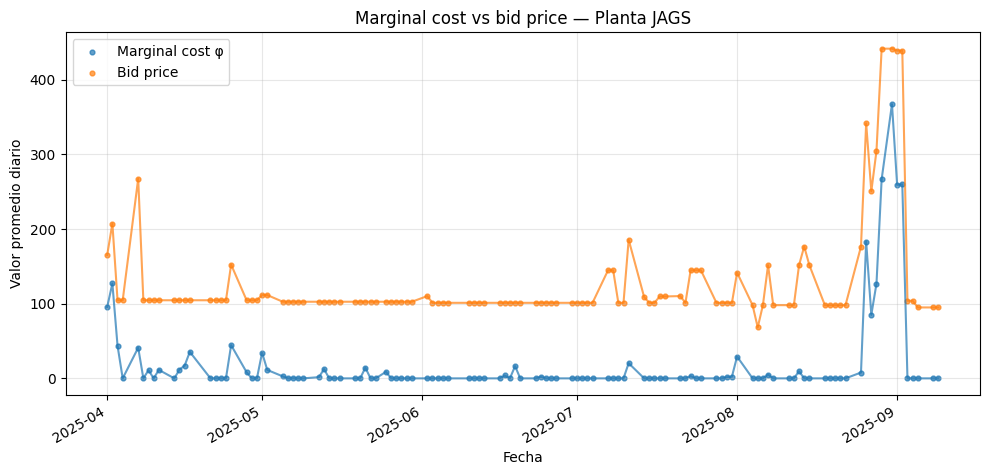

../results/fechas_117/phi_precio_JAGS_20250401_to_20250909_M50.png


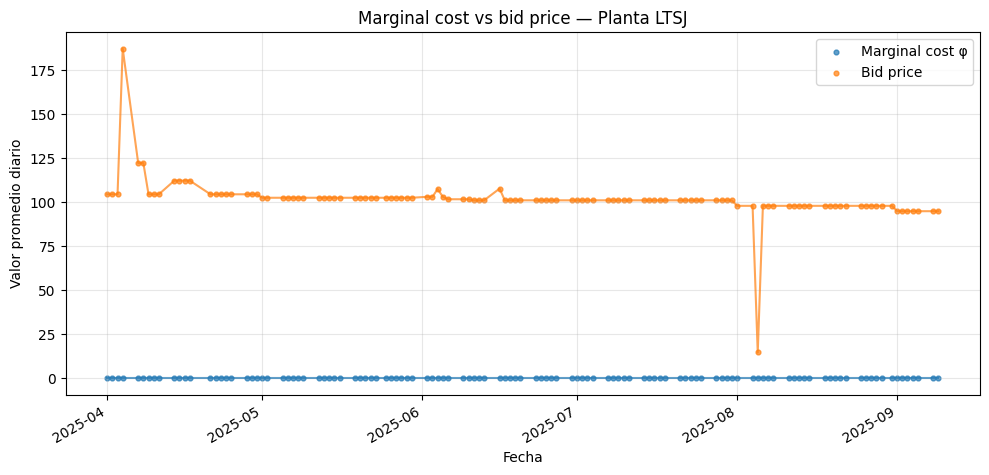

../results/fechas_117/phi_precio_LTSJ_20250401_to_20250909_M50.png


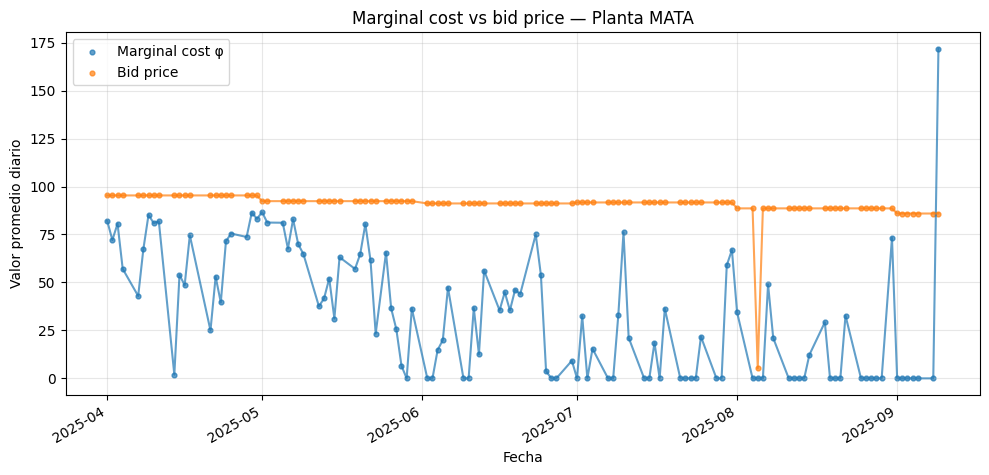

../results/fechas_117/phi_precio_MATA_20250401_to_20250909_M50.png


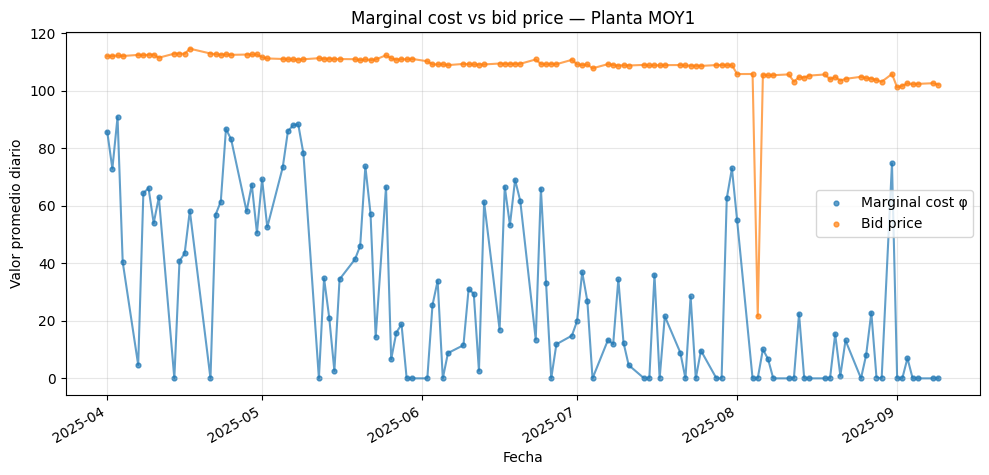

../results/fechas_117/phi_precio_MOY1_20250401_to_20250909_M50.png


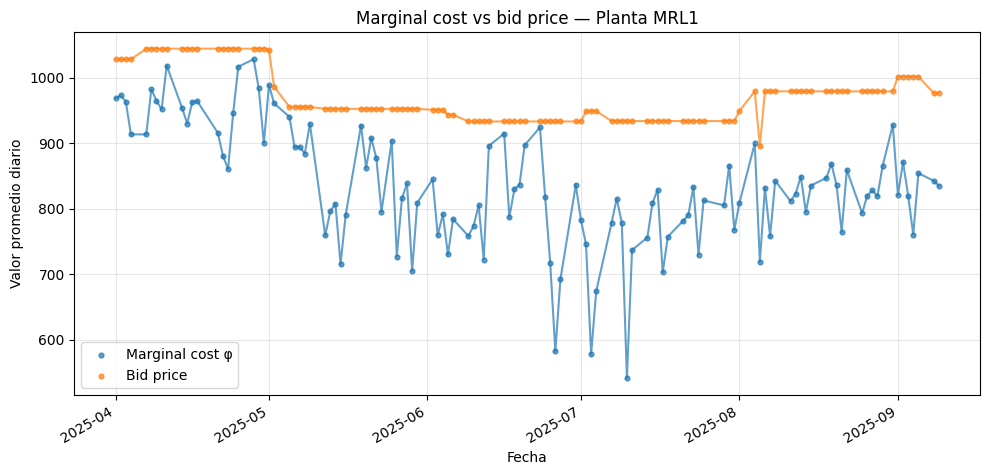

../results/fechas_117/phi_precio_MRL1_20250401_to_20250909_M50.png


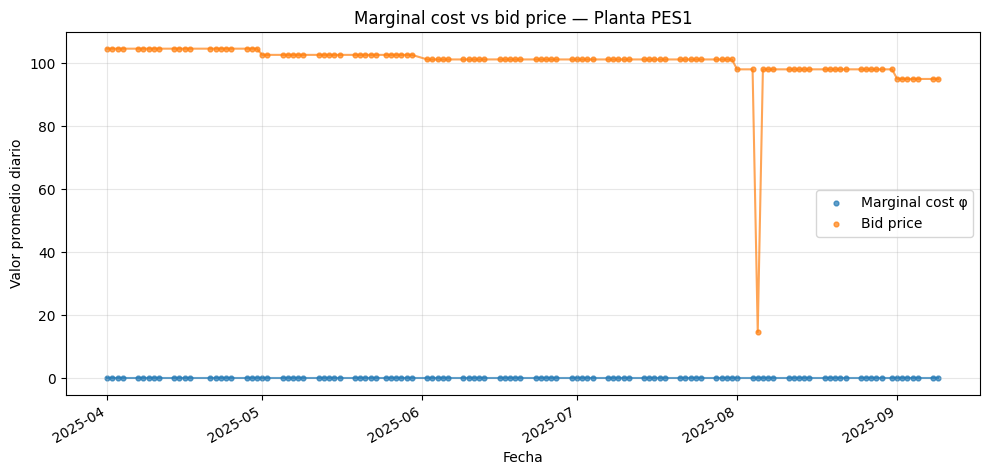

../results/fechas_117/phi_precio_PES1_20250401_to_20250909_M50.png


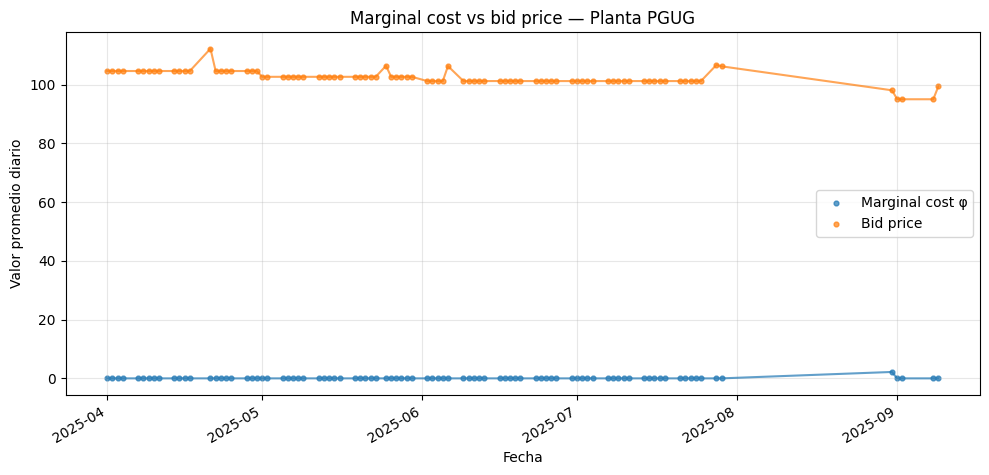

../results/fechas_117/phi_precio_PGUG_20250401_to_20250909_M50.png


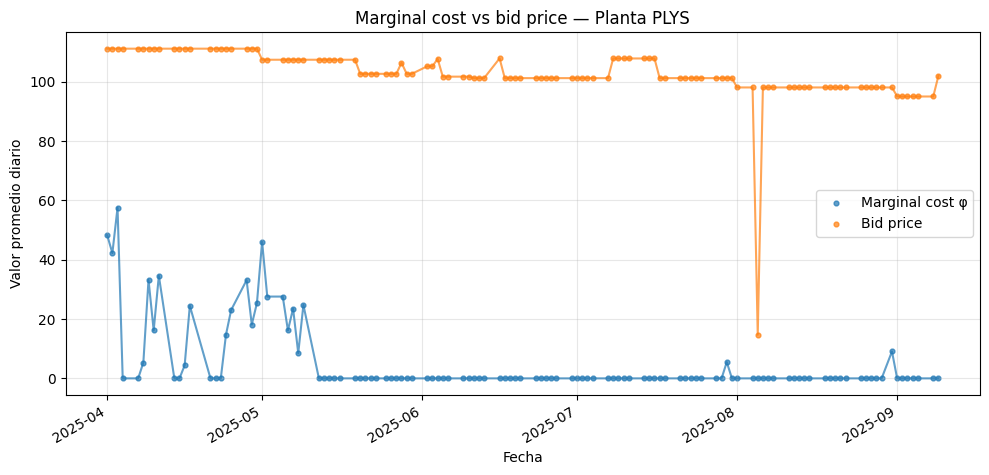

../results/fechas_117/phi_precio_PLYS_20250401_to_20250909_M50.png


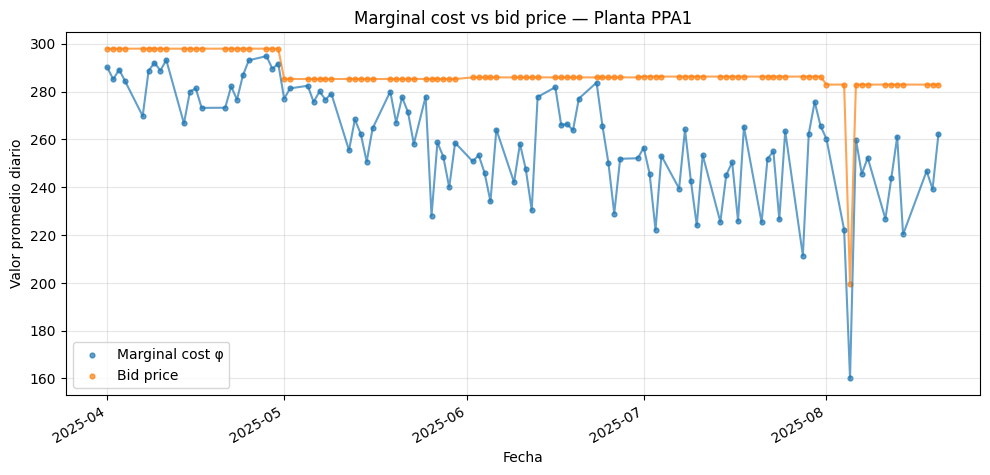

../results/fechas_117/phi_precio_PPA1_20250401_to_20250820_M50.png


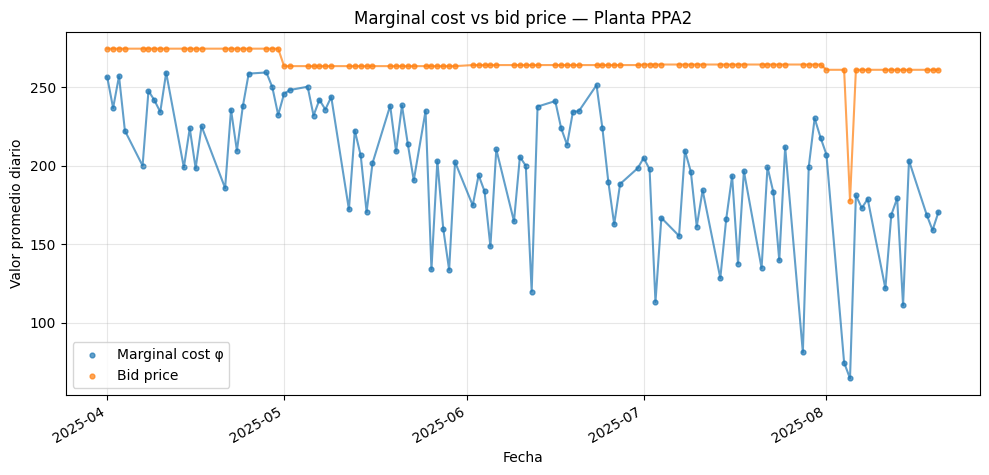

../results/fechas_117/phi_precio_PPA2_20250401_to_20250820_M50.png


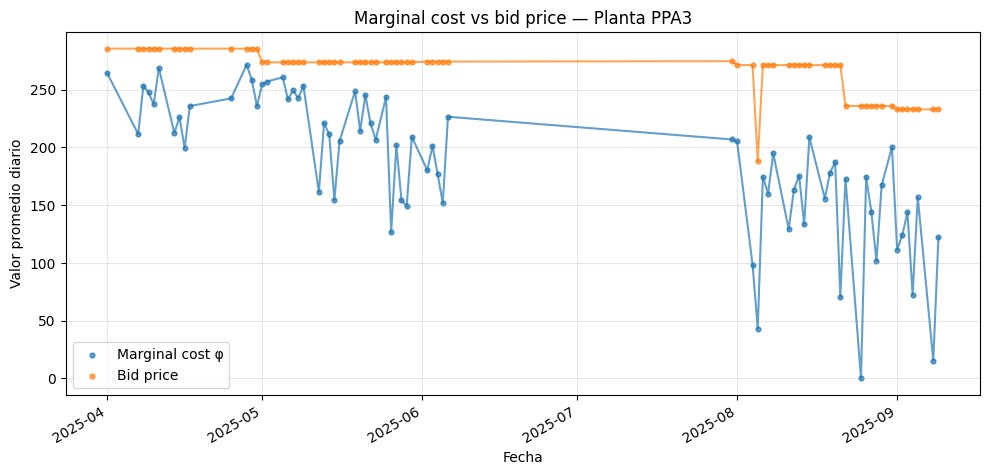

../results/fechas_117/phi_precio_PPA3_20250401_to_20250909_M50.png


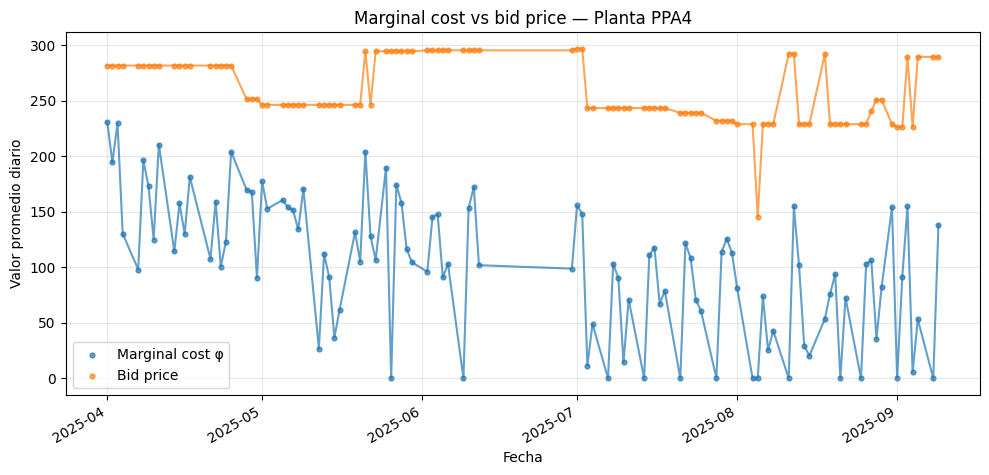

../results/fechas_117/phi_precio_PPA4_20250401_to_20250909_M50.png


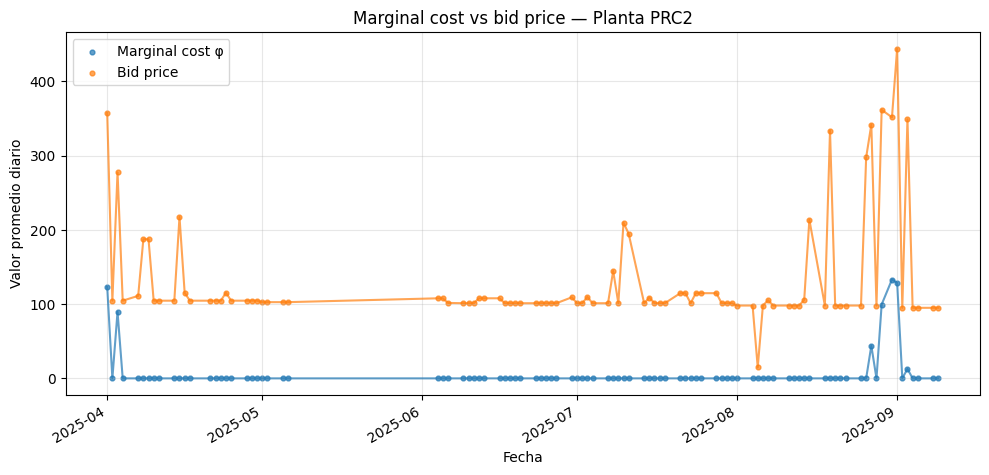

../results/fechas_117/phi_precio_PRC2_20250401_to_20250909_M50.png


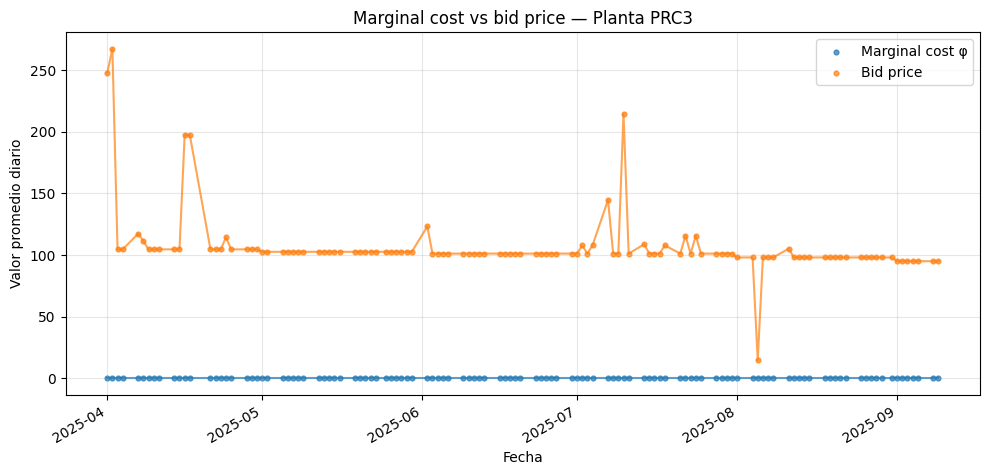

../results/fechas_117/phi_precio_PRC3_20250401_to_20250909_M50.png


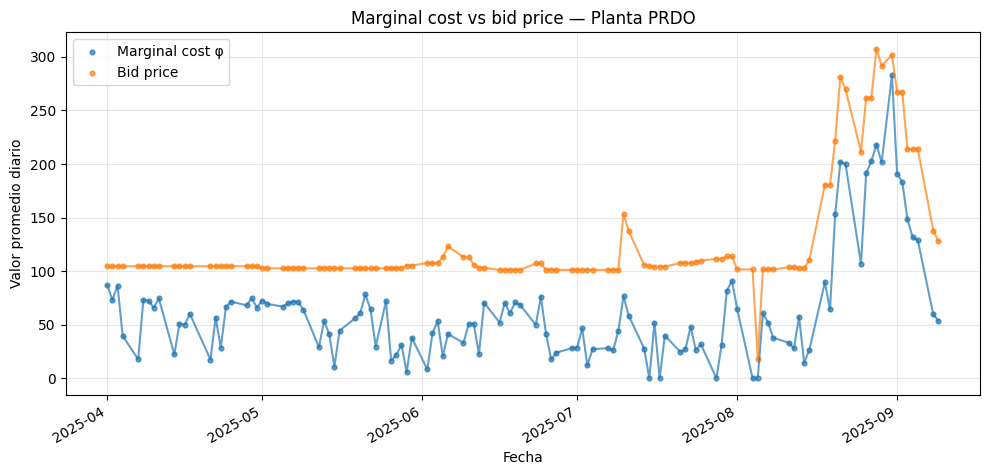

../results/fechas_117/phi_precio_PRDO_20250401_to_20250909_M50.png


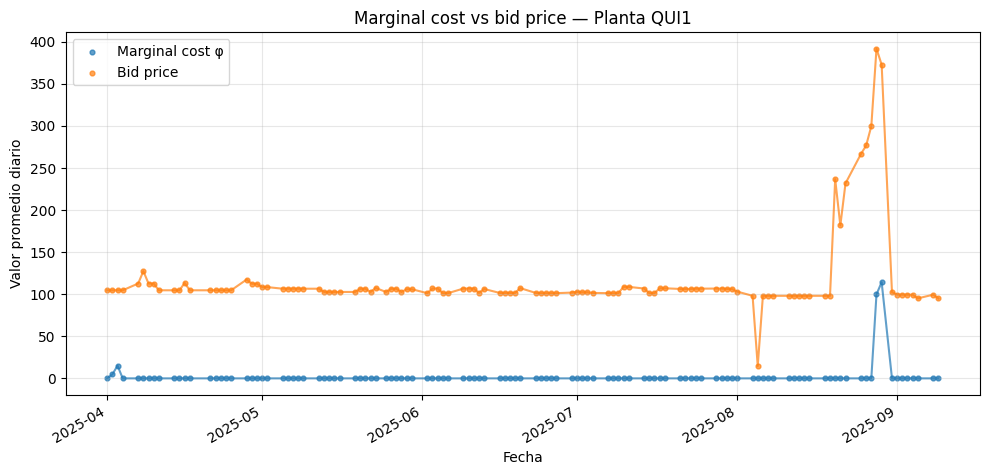

../results/fechas_117/phi_precio_QUI1_20250401_to_20250909_M50.png


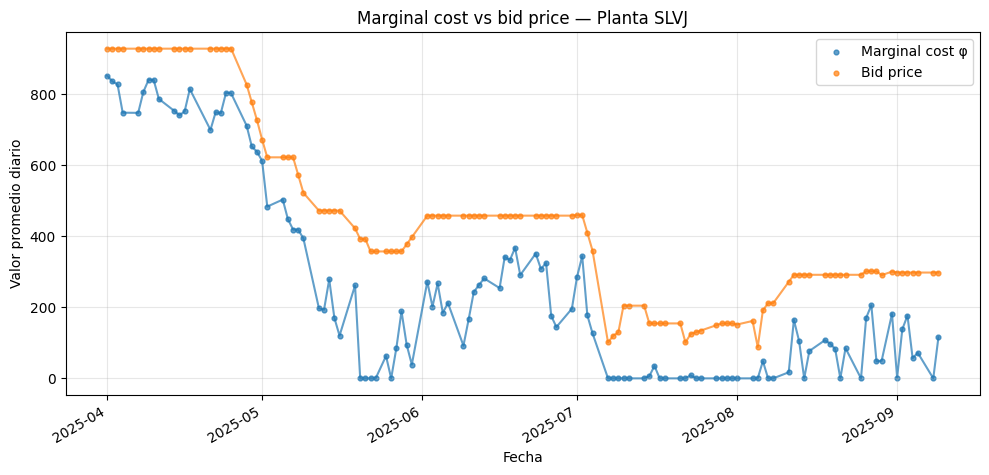

../results/fechas_117/phi_precio_SLVJ_20250401_to_20250909_M50.png


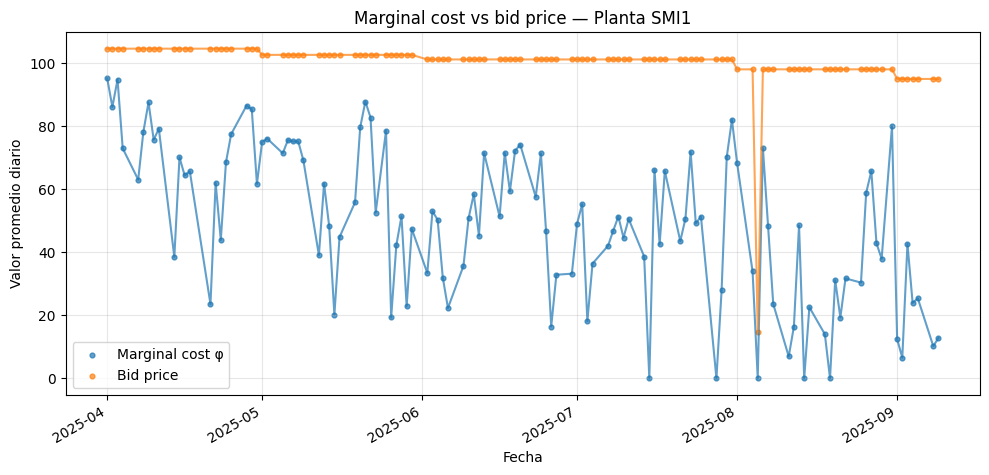

../results/fechas_117/phi_precio_SMI1_20250401_to_20250909_M50.png


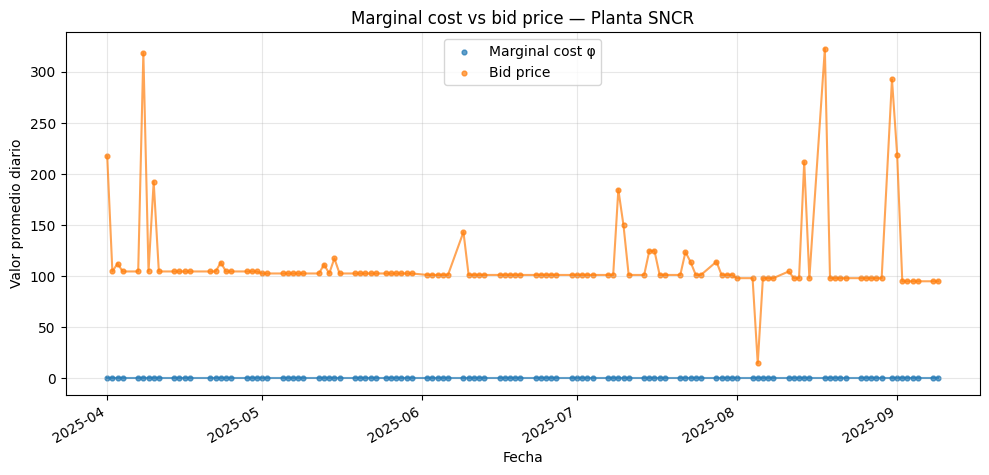

../results/fechas_117/phi_precio_SNCR_20250401_to_20250909_M50.png


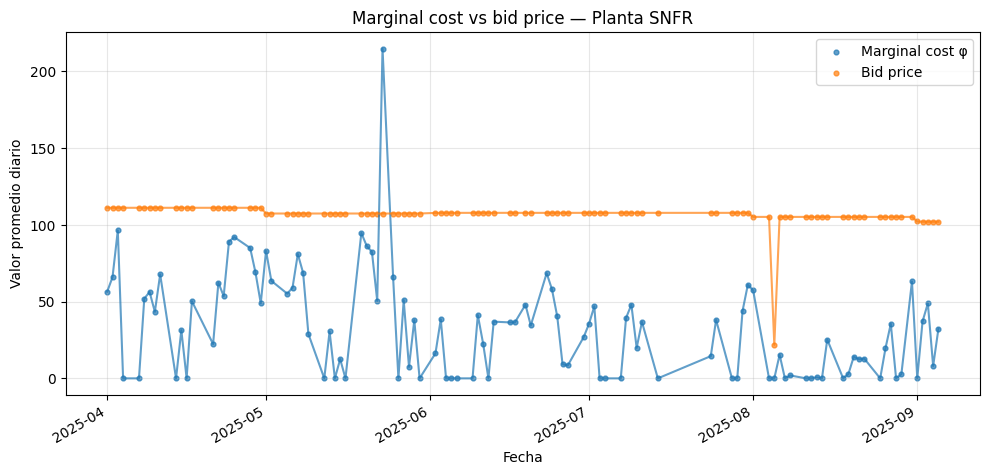

../results/fechas_117/phi_precio_SNFR_20250401_to_20250905_M50.png


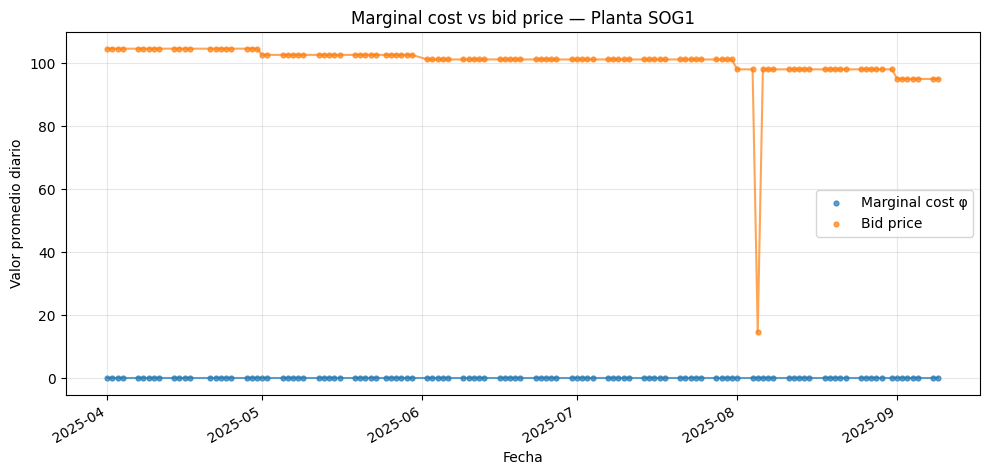

../results/fechas_117/phi_precio_SOG1_20250401_to_20250909_M50.png


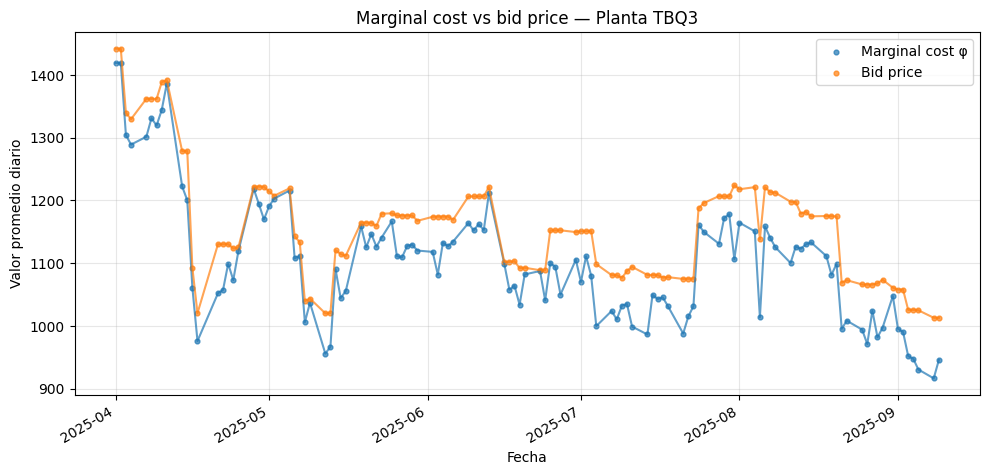

../results/fechas_117/phi_precio_TBQ3_20250401_to_20250909_M50.png


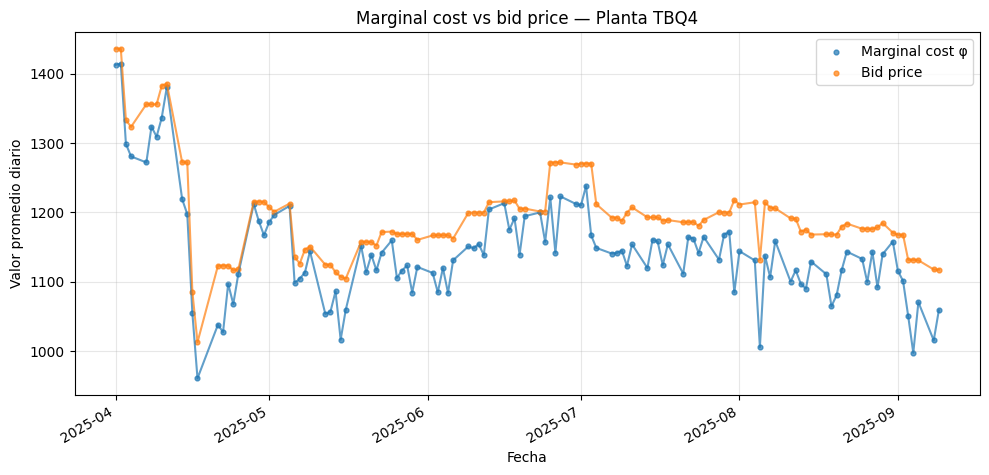

../results/fechas_117/phi_precio_TBQ4_20250401_to_20250909_M50.png


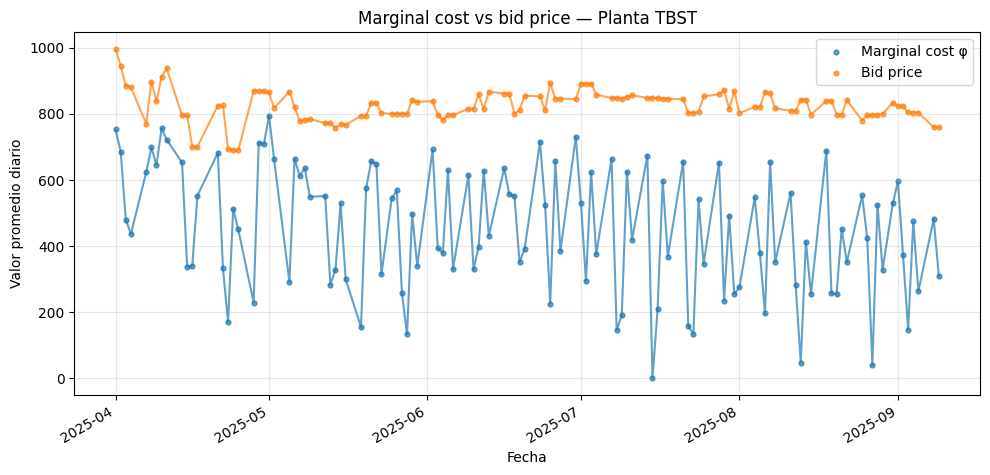

../results/fechas_117/phi_precio_TBST_20250401_to_20250909_M50.png


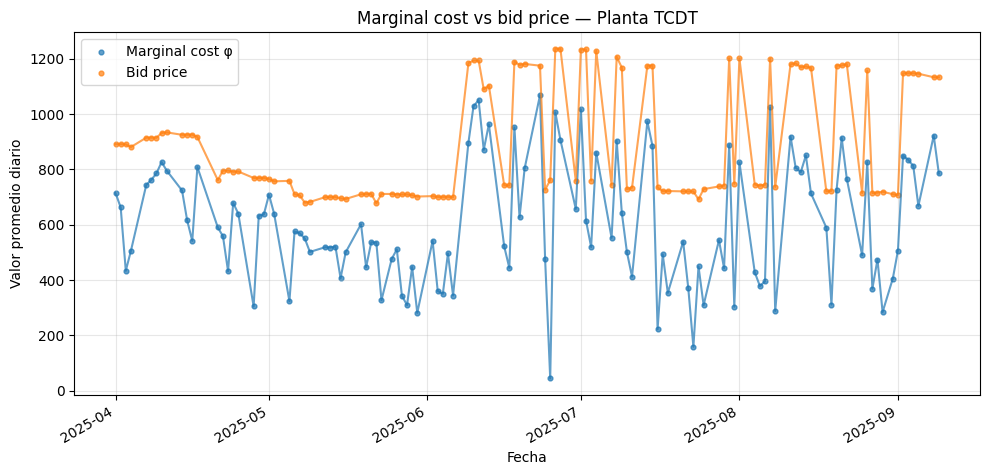

../results/fechas_117/phi_precio_TCDT_20250401_to_20250909_M50.png


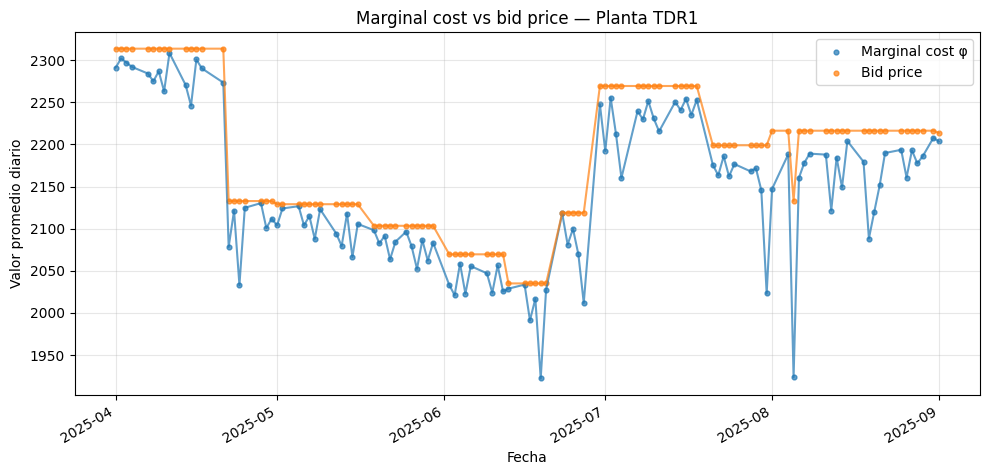

../results/fechas_117/phi_precio_TDR1_20250401_to_20250901_M50.png


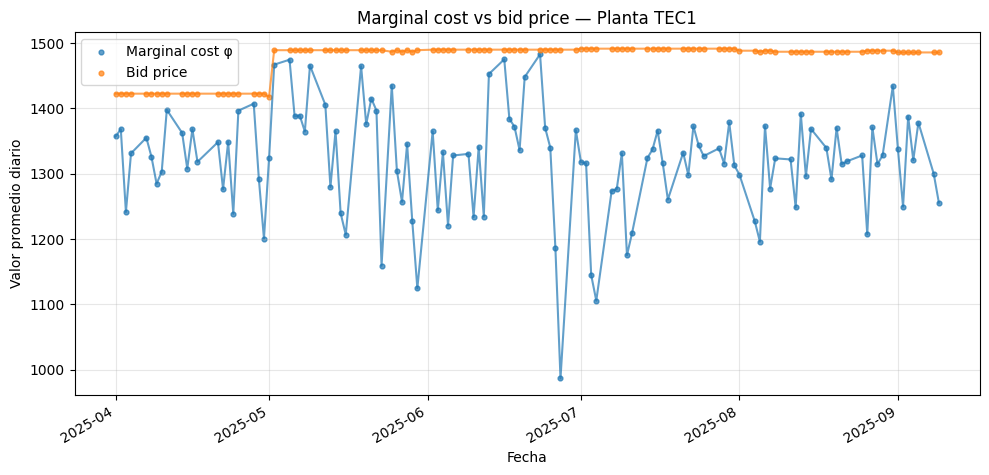

../results/fechas_117/phi_precio_TEC1_20250401_to_20250909_M50.png


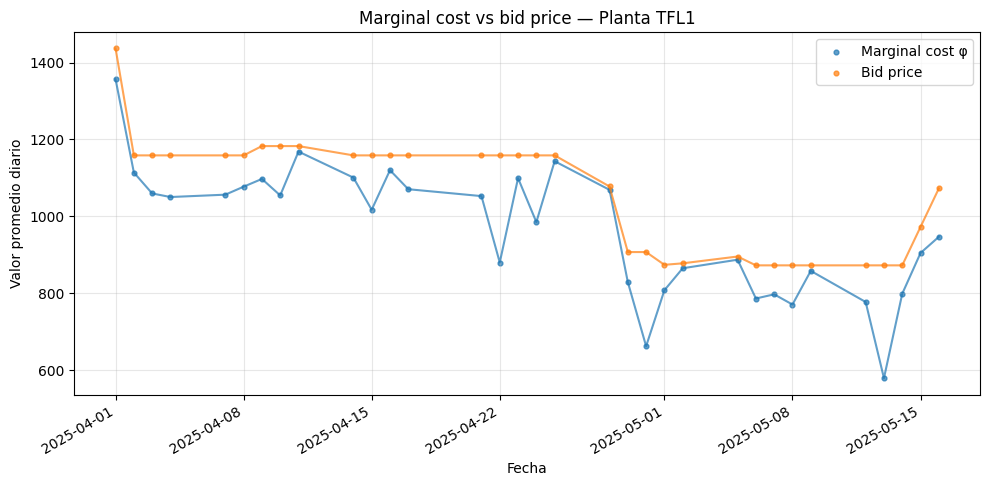

../results/fechas_117/phi_precio_TFL1_20250401_to_20250516_M50.png


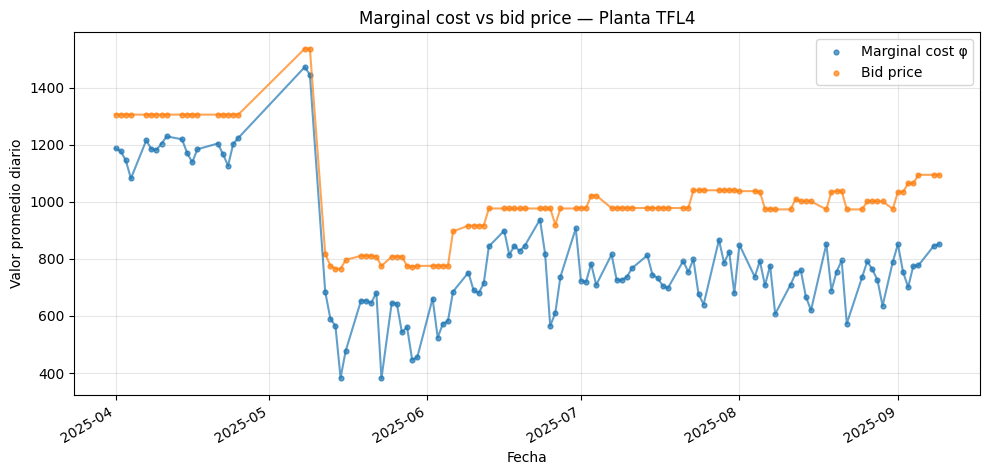

../results/fechas_117/phi_precio_TFL4_20250401_to_20250909_M50.png


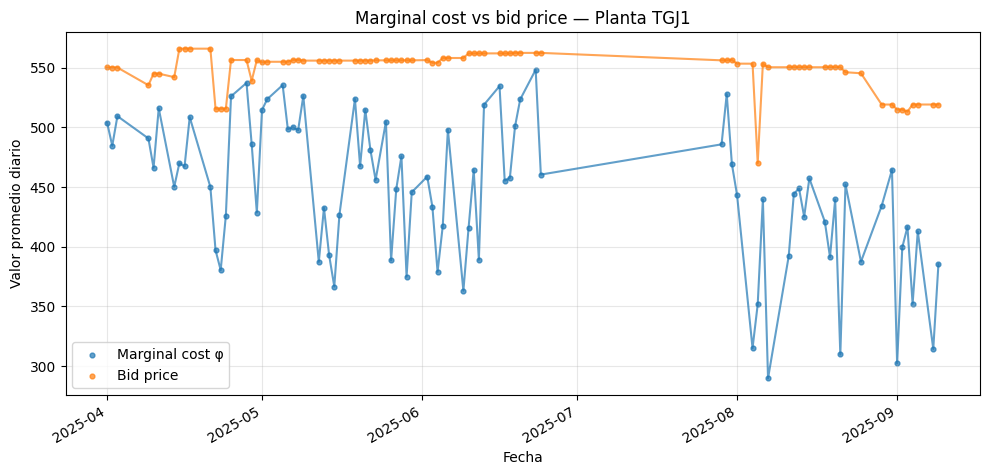

../results/fechas_117/phi_precio_TGJ1_20250401_to_20250909_M50.png


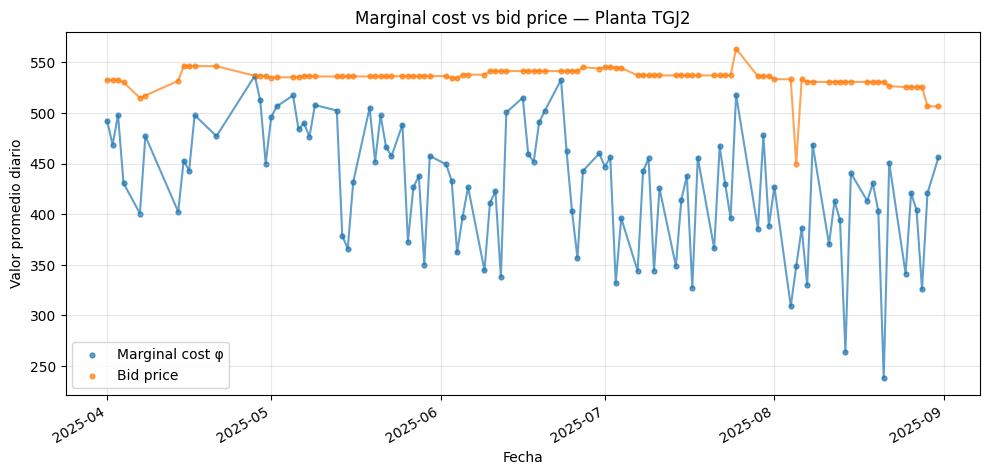

../results/fechas_117/phi_precio_TGJ2_20250401_to_20250831_M50.png


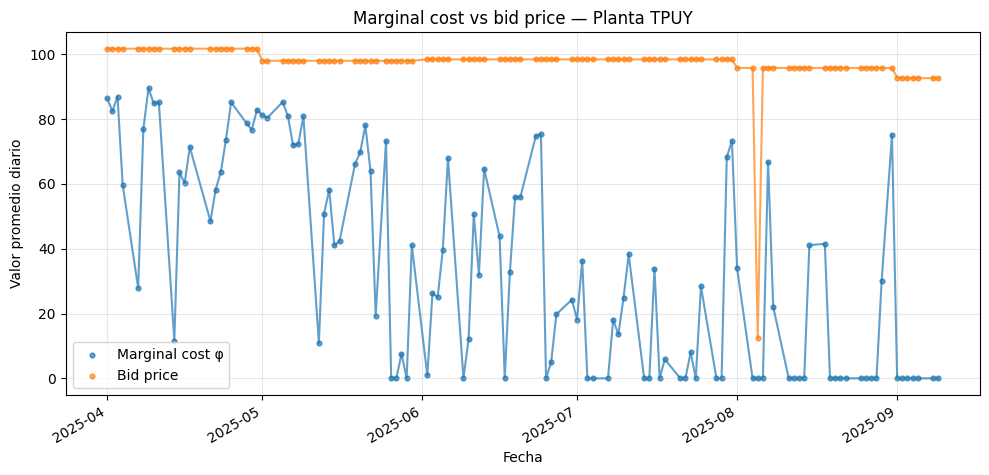

../results/fechas_117/phi_precio_TPUY_20250401_to_20250909_M50.png


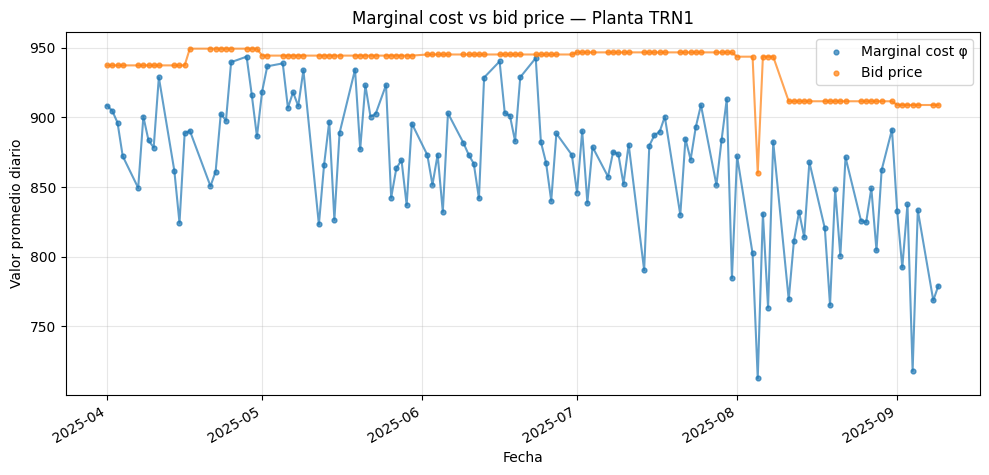

../results/fechas_117/phi_precio_TRN1_20250401_to_20250909_M50.png


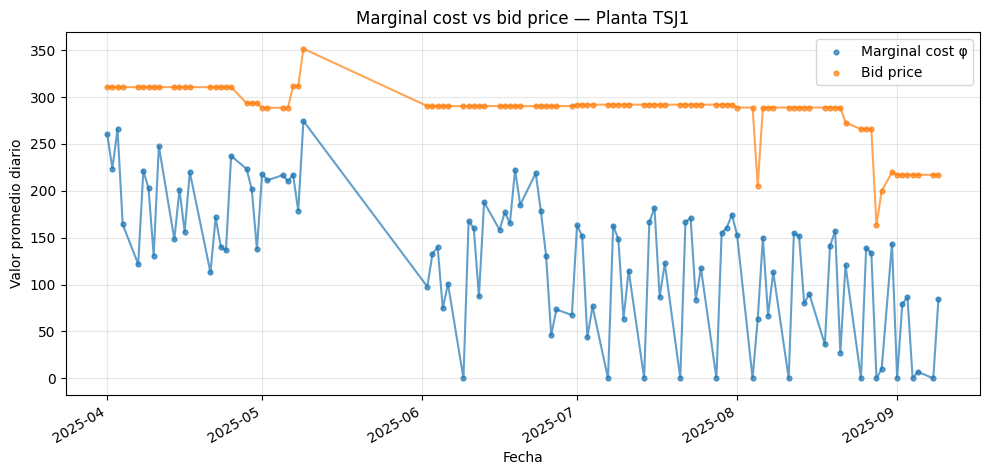

../results/fechas_117/phi_precio_TSJ1_20250401_to_20250909_M50.png


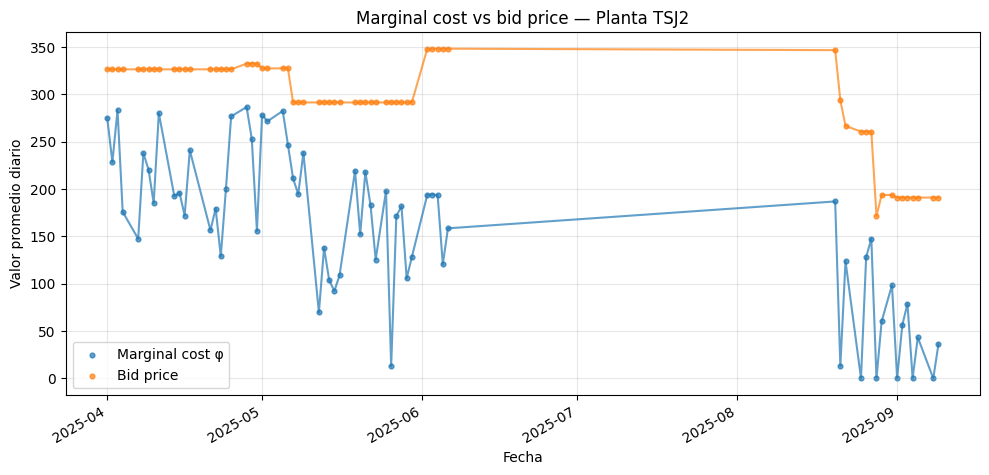

../results/fechas_117/phi_precio_TSJ2_20250401_to_20250909_M50.png


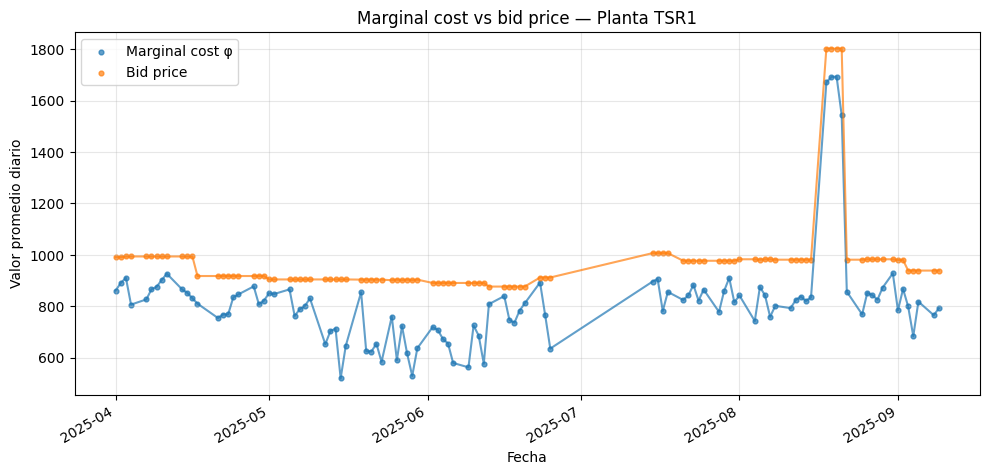

../results/fechas_117/phi_precio_TSR1_20250401_to_20250909_M50.png


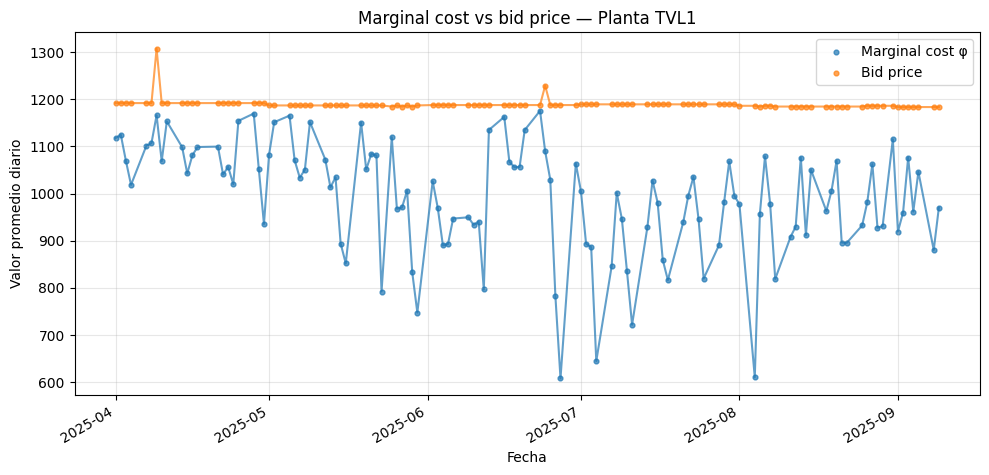

../results/fechas_117/phi_precio_TVL1_20250401_to_20250909_M50.png


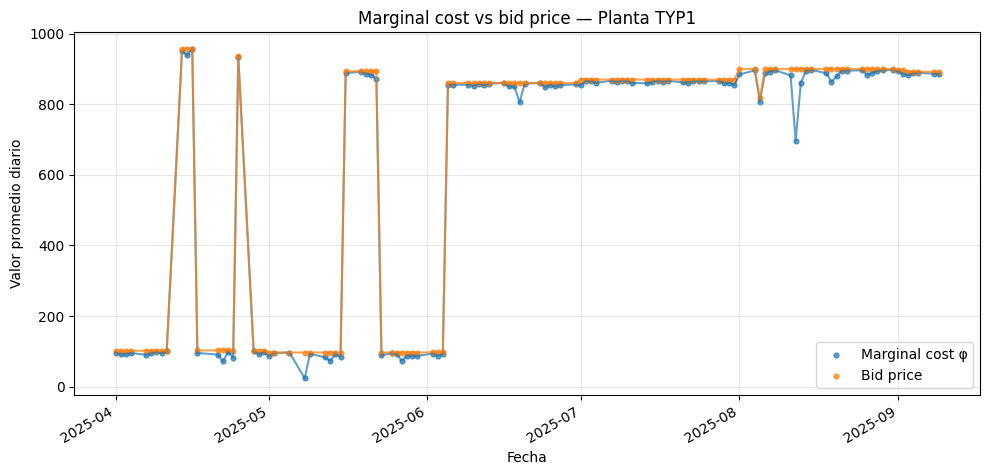

../results/fechas_117/phi_precio_TYP1_20250401_to_20250909_M50.png


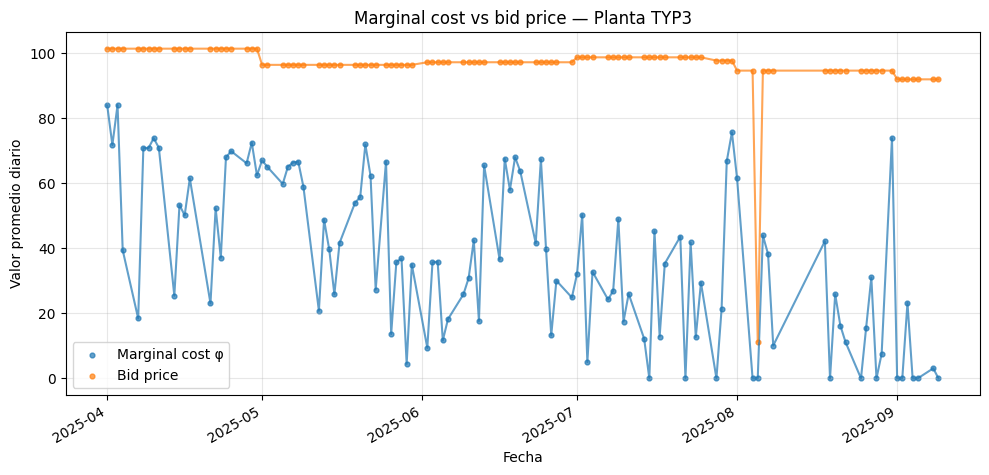

../results/fechas_117/phi_precio_TYP3_20250401_to_20250909_M50.png


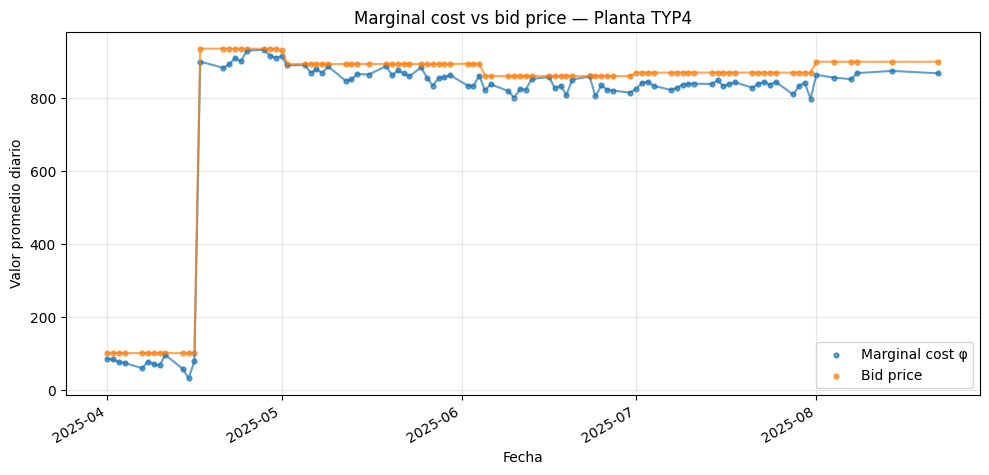

../results/fechas_117/phi_precio_TYP4_20250401_to_20250822_M50.png


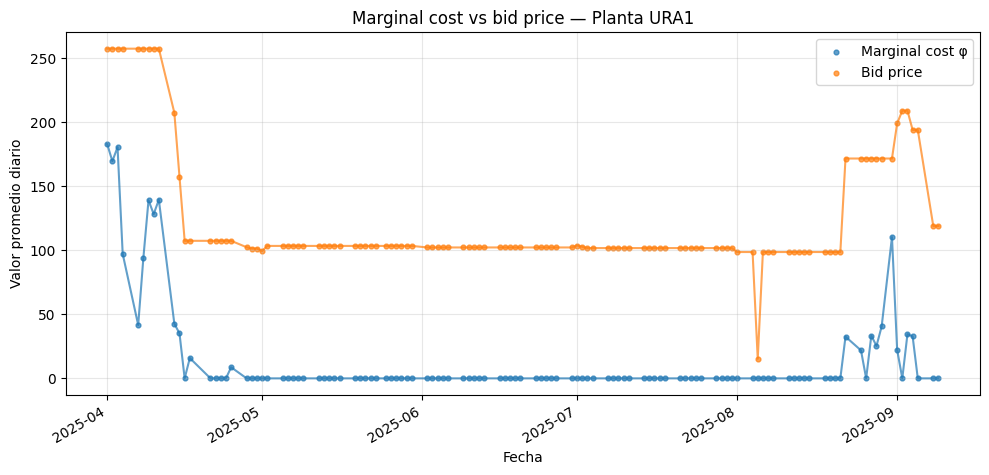

../results/fechas_117/phi_precio_URA1_20250401_to_20250909_M50.png


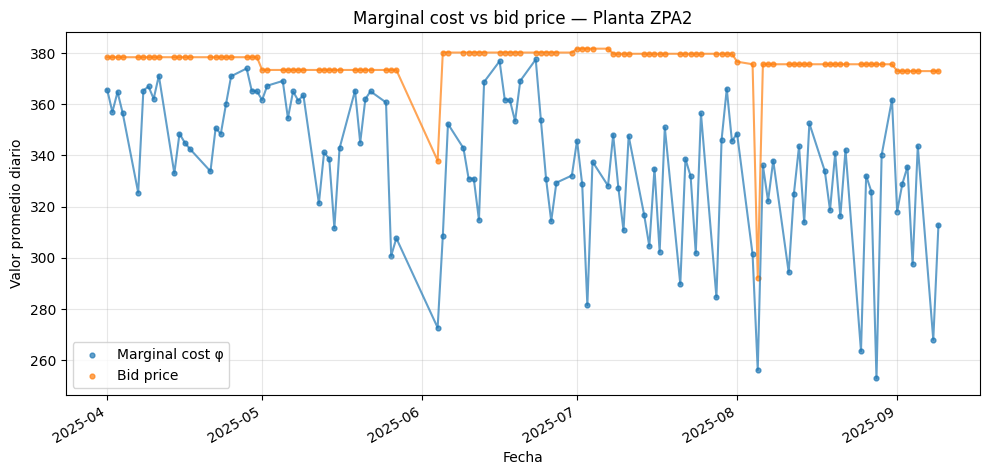

../results/fechas_117/phi_precio_ZPA2_20250401_to_20250909_M50.png


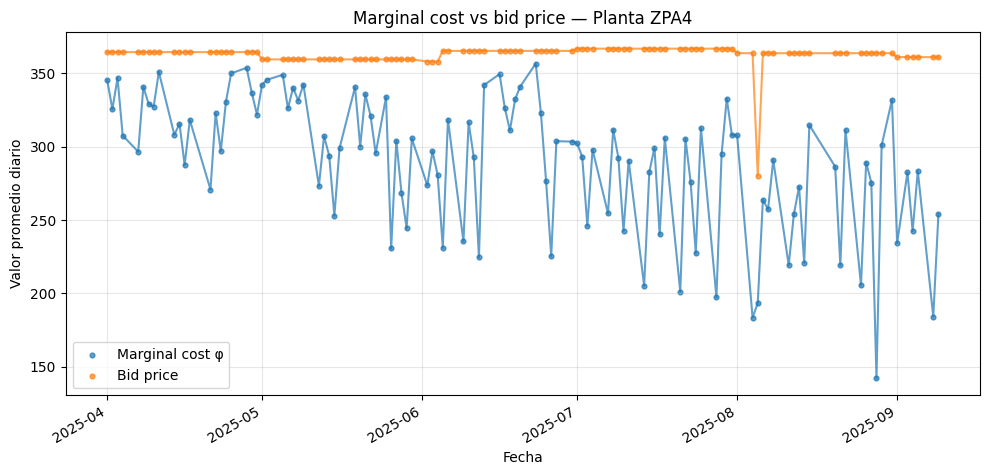

../results/fechas_117/phi_precio_ZPA4_20250401_to_20250909_M50.png


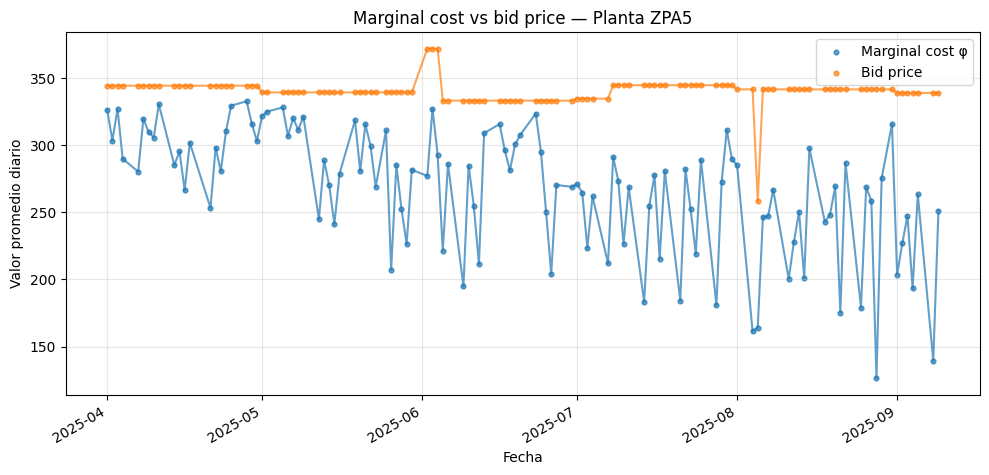

../results/fechas_117/phi_precio_ZPA5_20250401_to_20250909_M50.png


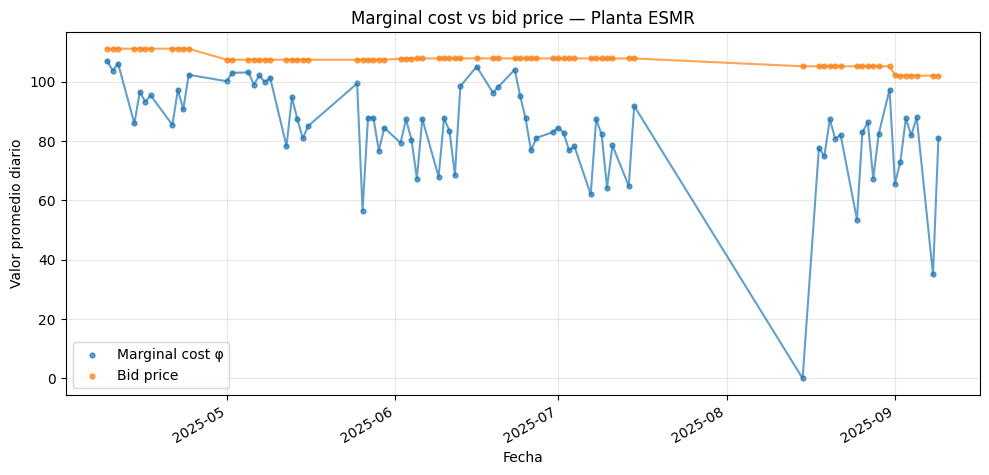

../results/fechas_117/phi_precio_ESMR_20250409_to_20250909_M50.png


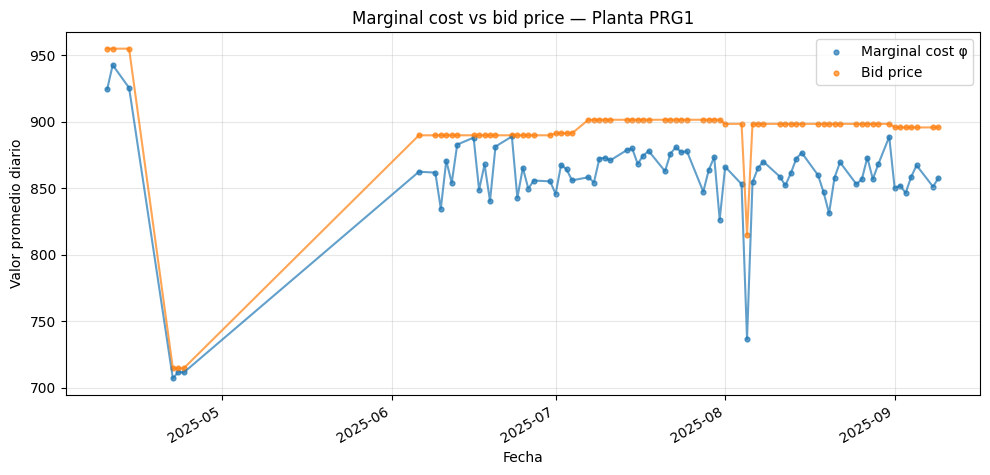

../results/fechas_117/phi_precio_PRG1_20250410_to_20250909_M50.png


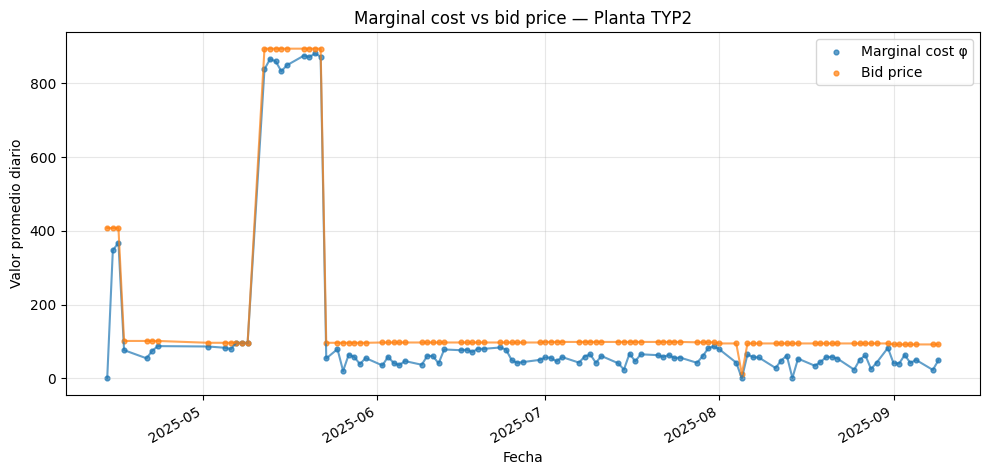

../results/fechas_117/phi_precio_TYP2_20250414_to_20250909_M50.png


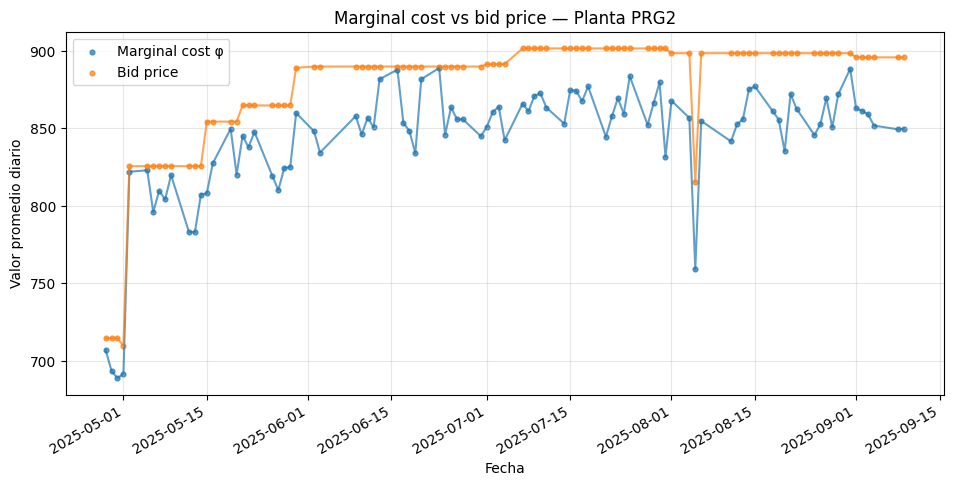

../results/fechas_117/phi_precio_PRG2_20250428_to_20250909_M50.png


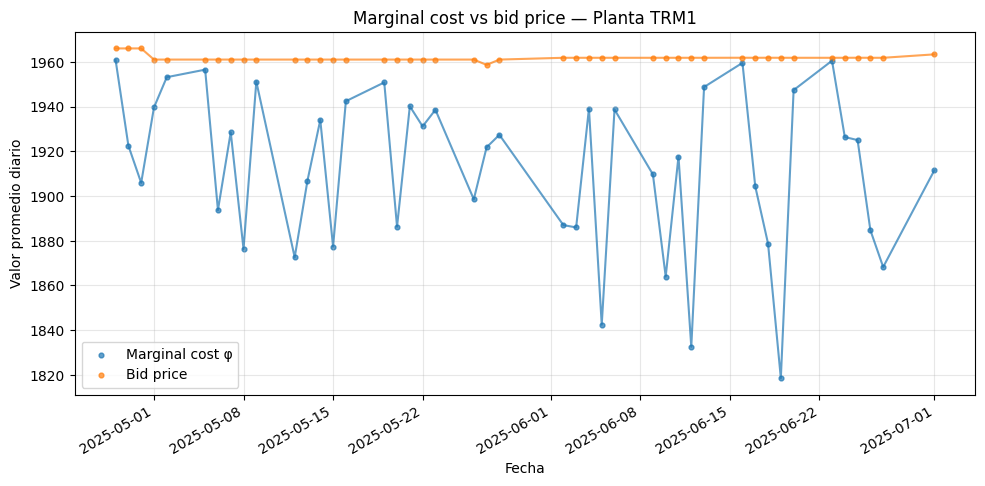

../results/fechas_117/phi_precio_TRM1_20250428_to_20250701_M50.png


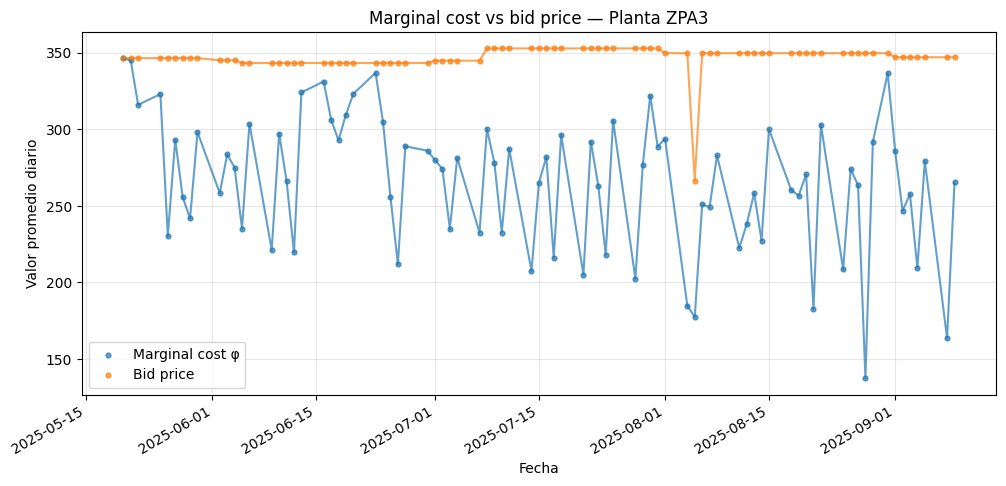

../results/fechas_117/phi_precio_ZPA3_20250520_to_20250909_M50.png


In [49]:
variable = 'phi'

df_grouped = df_grouped.dropna(subset=['Fecha', 'CodigoPlanta', variable, 'precio_d'])

for planta in df_grouped['CodigoPlanta'].unique():

    df_planta = (
        df_grouped[df_grouped['CodigoPlanta'] == planta]
        .groupby('Fecha', as_index=False)[[variable, 'precio_d']]
        .mean()
        .sort_values('Fecha')
    )

    plt.figure(figsize=(10, 5))

    plt.plot(df_planta['Fecha'], df_planta[variable], alpha=0.7)
    plt.scatter(df_planta['Fecha'], df_planta[variable], s=12, alpha=0.7, label='Marginal cost φ')

    plt.plot(df_planta['Fecha'], df_planta['precio_d'], alpha=0.7)
    plt.scatter(df_planta['Fecha'], df_planta['precio_d'], s=12, alpha=0.7, label='Bid price')

    plt.xlabel("Fecha")
    plt.ylabel("Valor promedio diario")
    plt.title(f"Marginal cost vs bid price — Planta {planta}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.gcf().autofmt_xdate()

    fecha_min_str = pd.to_datetime(df_planta['Fecha'].min()).strftime('%Y%m%d')
    fecha_max_str = pd.to_datetime(df_planta['Fecha'].max()).strftime('%Y%m%d')

    filename = f"{variable}_precio_{planta}_{fecha_min_str}_to_{fecha_max_str}_M{M}.png"
    filepath = os.path.join(sub_dir, filename)

    plt.savefig(filepath, dpi=300)
    plt.show()

    print(f"{filepath}")


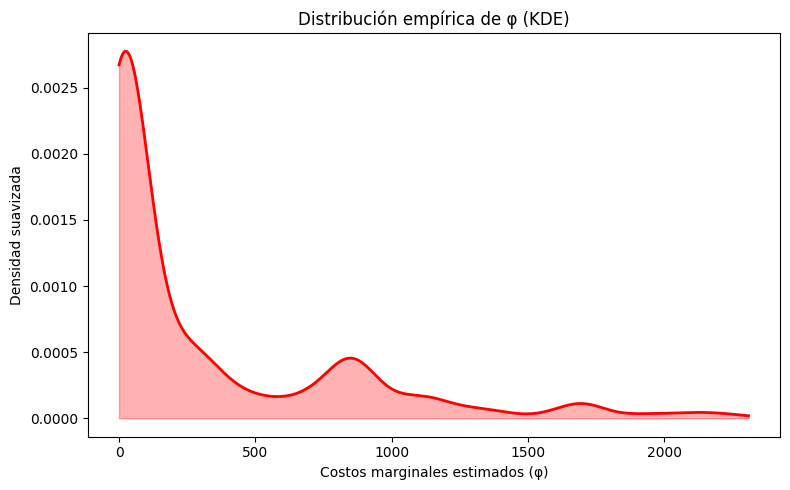

In [50]:

phi = pd.to_numeric(df_grouped['phi'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(phi)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Costos marginales estimados (φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de φ (KDE)")
plt.tight_layout()
plt.show()


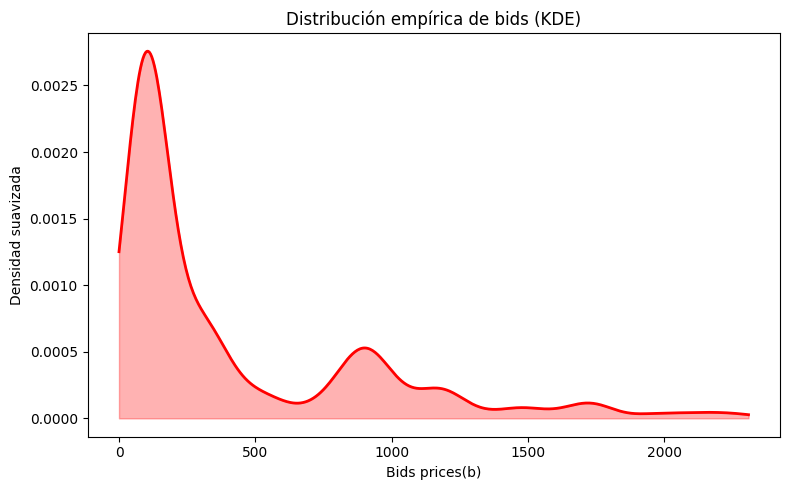

In [52]:
bids = pd.to_numeric(df_grouped['precio_d'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(bids)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Bids prices(b)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de bids (KDE)")
plt.tight_layout()
plt.show()


### Más markup - la grandes

In [53]:
df_result[df_result['CodigoPlanta'].isin(['GVIO', 'PES1', 'SNCR'])]
#PES1 es ituango, GVIO es guavio, SNCR es san carlos

FechaHora CodigoPlanta  precio   cantidad  cantidad_pos  \
581    2025-05-25 23:00:00         SNCR  102.64   930000.0      930000.0   
582    2025-05-25 22:00:00         SNCR  102.64   930000.0      930000.0   
583    2025-05-25 21:00:00         SNCR  102.64   930000.0      930000.0   
584    2025-05-25 20:00:00         SNCR  102.64   930000.0      930000.0   
585    2025-05-25 19:00:00         SNCR  102.64   930000.0      930000.0   
...                    ...          ...     ...        ...           ...   
175423 2025-09-05 04:00:00         SNCR   95.00  1085000.0     1085000.0   
175424 2025-09-05 03:00:00         SNCR   95.00  1085000.0     1085000.0   
175425 2025-09-05 02:00:00         SNCR   95.00  1085000.0     1085000.0   
175426 2025-09-05 01:00:00         SNCR   95.00  1085000.0     1085000.0   
175427 2025-09-05 00:00:00         SNCR   95.00  1085000.0     1085000.0   

             Fecha  cluster  gamma_thumb      EQpos         EdQb  \
581     2025-05-25        6    24.943955   930000.0 -1682.810088   
582     2025-05-25        6    24.943955   930000.0 -1680.855989   
583     2025-05-25        6    24.943955   930000.0 -1646.301409   
584     2025-05-25        6    24.943955   930000.0 -1643.781681   
585     2025-05-25        6    24.943955   930000.0 -1643.781681   
...            ...      ...          ...        ...          ...   
175423  2025-09-05        2    24.943955  1085000.0 -1703.907115   
175424  2025-09-05        2    24.943955  1085000.0 -1707.154658   
175425  2025-09-05        2    24.943955  1085000.0 -1703.907115   
175426  2025-09-05        2    24.943955  1085000.0 -1699.893235   
175427  2025-09-05        2    24.943955  1085000.0 -1694.920867   

        ratio_prueba  phi_h  
581      -552.647032    0.0  
582      -553.289518    0.0  
583      -564.902633    0.0  
584      -565.768563    0.0  
585      -565.768563    0.0  
...              ...    ...  
175423   -636.771800    0.0  
175424   -635.560460    0.0  
175425   -636.771800    0.0  
175426   -638.275380    0.0  
175427   -640.147880    0.0  

[8410 rows x 12 columns]